# Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system $(t=1,2, \ldots)$ with three arms. We denote the arm set as $\{1,2,3\}$. Pulling each arm $j(j \in\{1,2,3\})$ will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, i.e., $\operatorname{Bern}\left(\theta_{j}\right)$. Specifically,

$$
r_{j}= \begin{cases}1, & w \cdot p \cdot \theta_{j} \\ 0, & w \cdot p \cdot 1-\theta_{j}\end{cases}
$$

where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
Now we run this bandit system for $N(N \gg 3)$ time slots. In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in\{1,2,3\}$. Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$. Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, i.e.,

$$
\max _{I(t), t=1, \ldots, N} \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]
$$

If we know the values of $\theta_{j}, j \in\{1,2,3\}$, this problem is trivial. Since $r_{I(t)} \sim \operatorname{Bern}\left(\theta_{I(t)}\right)$,

$$
\mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]=\sum_{t=1}^{N} \mathbb{E}\left[r_{I(t)}\right]=\sum_{t=1}^{N} \theta_{I(t)}
$$

Let $I(t)=I^{*}=\arg \max \theta_{j}$ for $t=1,2, \ldots, N$, then

$$
\max _{I(t), t=1, \ldots, N} \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]=N \cdot \theta_{I^{*}}
$$

However, in reality, we do not know the values of $\theta_{j}, j \in\{1,2,3\}$. We need to estimate the values $\theta_{j}, j \in\{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

<img src="picture/greedy_UCB.png" width="50%" align='left'>
<img src="picture/TS.png" width="50%" align='left'>

## Problems 1  
### Question  
Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.
<center>
<table>
  <tr>
    <th>Arm j</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
  </tr>
  <tr>
    <td>θ<sub>j</td>
    <td>0.7</td>
    <td>0.5</td>
    <td>0.4</td>
  </tr>
</table>
</center>

### Solution
Since each arm's parameter is known from the oracle, we need to choose the arm with the largest parameter to maximize the expectation of aggregate rewards over $N$ time slots.

Given $\theta_1 = 0.7, \theta_2 = 0.5, \theta_3 = 0.4$,
we have $\theta_1 > \theta_2 > \theta_3$.
Thus, we choose arm 1 every time.

i.e. $$\forall t, I(t)=I^*=\arg \max\limits_{j\in\{1,2,3\}}\theta_j=1$$
$$\theta_{I(t)} = \theta_1 = 0.7$$

Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

$$E(r_{I(t)}) = \theta_{I(t)}$$

The maximum expected value is 
$$\max_{I(t),t=1,2,\cdots,N}\ E\big[\sum_{t=1}^Nr_{I(t)}\big]$$
$$=\max_{I(t),t=1,2,\cdots,N}\ \sum_{t=1}^NE\big[r_{I(t)}\big]$$
$$=N \cdot \theta_{I^*} = 5000 \times 0.7 = 3500$$

Therefore, with the given oracle parameters, the maximum expected value is 3500.


## Problem 2  
### Question
2. Implement classical bandit algorithms with following settings: 
   - $N=5000$
   - $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
   - UCB with $c \in \{1,5,10\}$.
   - TS with $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ and $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(a3,b3)=(2,3)\right\}$

### Solution  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, theta=[0.7, 0.5, 0.4]):
        self.theta = theta  
        self.n_arms = len(theta)
        self.counts = np.zeros(self.n_arms) 
        self.values = np.zeros(self.n_arms)
        
    def pull(self, arm):
        return np.random.binomial(1, self.theta[arm])
    
    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward

class EpsilonGreedy(Bandit):
    def __init__(self, epsilon, theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.epsilon = epsilon
        
    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)
    
    def modify_parameter(self, epsilon):
        self.epsilon = epsilon

class UCB(Bandit):
    def __init__(self, c, theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.c = c
        
    def select_arm(self):
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        total_counts = sum(self.counts)
        ucb_values = self.values + self.c * np.sqrt(2 * np.log(total_counts) / self.counts)
        return np.argmax(ucb_values)
    
    def modify_parameter(self, c):
        self.c = c

class ThompsonSampling(Bandit):
    def __init__(self, alpha=[1,1,1], beta=[1,1,1], theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.alpha = np.array(alpha)
        self.beta = np.array(beta)
        
    def select_arm(self):
        samples = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.n_arms)]
        return np.argmax(samples)
    
    def update(self, arm, reward):
        super().update(arm, reward)
        self.alpha[arm] += reward
        self.beta[arm] += (1 - reward)

    def modify_parameter(self, alpha, beta):
        self.alpha = np.array(alpha)
        self.beta = np.array(beta)

## Problem 3
Each experiment lasts for N = 5000 time slots, and we run each experiment 200 trials. Results are averaged over these 200 independent trials.  

epsilon = 0.1   reward:  3412.49  regret:  87.35449999999899  variances:  1358.7098999999998
epsilon = 0.5   reward:  3077.745  regret:  418.9664999999875  variances:  1039.8599749999996
epsilon = 0.9   reward:  2747.135  regret:  749.8360000000154  variances:  1244.376775
c = 1          reward:  3410.505  regret:  90.27000000004253  variances:  1167.5199750000002
c = 5          reward:  2980.715  regret:  519.4694999994001  variances:  1379.5837750000005
c = 10         reward:  2828.685  regret:  672.7809999995737  variances:  1159.6257750000002
alpha = [1,1,1] beta = [1,1,1] reward:  3481.865  regret:  18.158499999998494  variances:  1138.876775
alpha = [601,401,2] beta = [401,601,3] reward:  3490.19  regret:  9.158999999999068  variances:  993.6838999999999


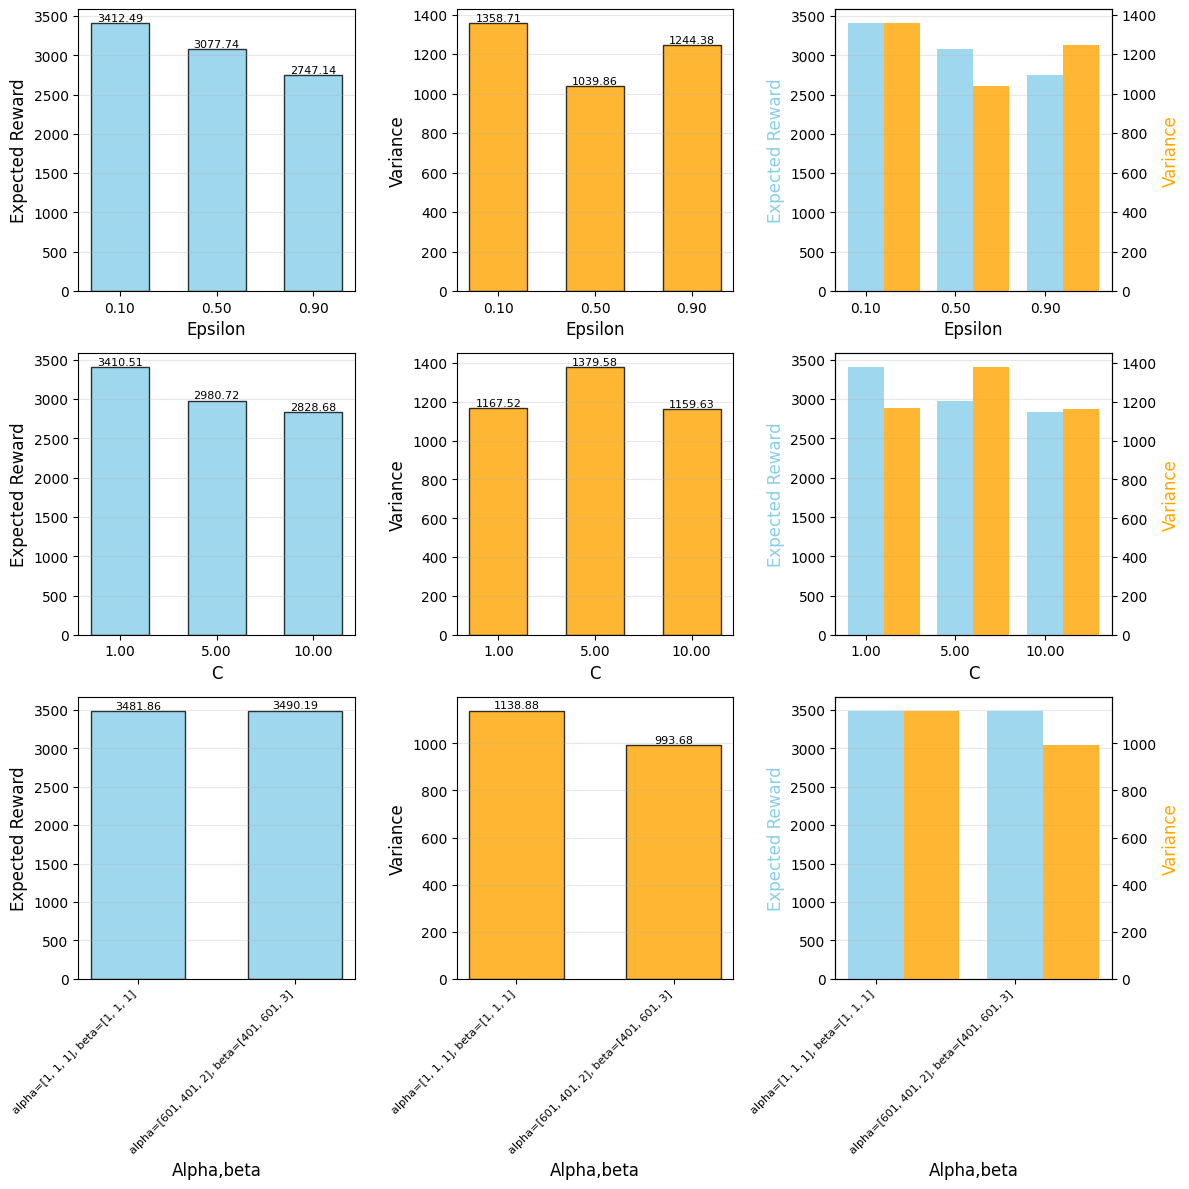

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'epsilon_greedy': [0.1, 0.5, 0.9],  
    'ucb': [1, 5, 10],  
    'ts': [
        ([1, 1, 1], [1, 1, 1]), 
        ([601, 401, 2], [401, 601, 3]) 
    ]
}
results_rewards = {
    'epsilon_greedy': [],
    'ucb': [],
    'ts': []
}
results_variances = {
    'epsilon_greedy': [],
    'ucb': [],
    'ts': []
}
results_regrets = {
    'epsilon_greedy': [],
    'ucb': [],
    'ts': []
}

# 假设 EpsilonGreedy, UCB 和 ThompsonSampling 类已经定义并能正常运行
for key in ['epsilon_greedy', 'ucb', 'ts']:
    for value in experiments[key]:
        trial_rewards_list = []  # 用于记录每次实验的奖励
        cumulative_rewards = 0
        cumulative_regrets = 0
        
        for _ in range(num_trials):
            if key == 'epsilon_greedy':
                bandit = EpsilonGreedy(epsilon=value)
            elif key == 'ucb':
                bandit = UCB(c=value)
            elif key == 'ts':
                bandit = ThompsonSampling(alpha=value[0], beta=value[1])
                
            trial_rewards = []
            for t in range(N):
                arm = bandit.select_arm()
                reward = bandit.pull(arm)
                bandit.update(arm, reward)
                trial_rewards.append(reward)
                cumulative_rewards += reward
                regret = max(bandit.theta) - bandit.theta[arm]
                cumulative_regrets += regret

            trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励


        # 计算期望奖励和方差
        mean_reward = cumulative_rewards / num_trials
        variance_reward = np.var(trial_rewards_list)

        results_rewards[key].append(mean_reward)
        results_variances[key].append(variance_reward)
        results_regrets[key].append(cumulative_regrets / num_trials)

# 保留原来的print内容不变
print("epsilon = 0.1   reward: ", results_rewards['epsilon_greedy'][0], " regret: ", results_regrets['epsilon_greedy'][0], " variances: ", results_variances['epsilon_greedy'][0])
print("epsilon = 0.5   reward: ", results_rewards['epsilon_greedy'][1], " regret: ", results_regrets['epsilon_greedy'][1], " variances: ", results_variances['epsilon_greedy'][1])
print("epsilon = 0.9   reward: ", results_rewards['epsilon_greedy'][2], " regret: ", results_regrets['epsilon_greedy'][2], " variances: ", results_variances['epsilon_greedy'][2])
print("c = 1          reward: ", results_rewards['ucb'][0], " regret: ", results_regrets['ucb'][0], " variances: ", results_variances['ucb'][0])
print("c = 5          reward: ", results_rewards['ucb'][1], " regret: ", results_regrets['ucb'][1], " variances: ", results_variances['ucb'][1])
print("c = 10         reward: ", results_rewards['ucb'][2], " regret: ", results_regrets['ucb'][2], " variances: ", results_variances['ucb'][2])
print("alpha = [1,1,1] beta = [1,1,1] reward: ", results_rewards['ts'][0], " regret: ", results_regrets['ts'][0], " variances: ", results_variances['ts'][0])
print("alpha = [601,401,2] beta = [401,601,3] reward: ", results_rewards['ts'][1], " regret: ", results_regrets['ts'][1], " variances: ", results_variances['ts'][1])

# 生成期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{val:.2f}" for val in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{val:.2f}" for val in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{epsilon:.2f}" for epsilon in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 3 行 3 列的图像布局
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# 绘制每个算法的期望奖励、方差和期望+方差的合成图像
# epsilon_greedy
plot_expectation(axs[0, 0], results_rewards['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")
plot_variance(axs[0, 1], results_variances['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")
plot_combined(axs[0, 2], results_rewards['epsilon_greedy'], results_variances['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")

# ucb
plot_expectation(axs[1, 0], results_rewards['ucb'], experiments['ucb'], "c")
plot_variance(axs[1, 1], results_variances['ucb'], experiments['ucb'], "c")
plot_combined(axs[1, 2], results_rewards['ucb'], results_variances['ucb'], experiments['ucb'], "c")

# ts
plot_expectation(axs[2, 0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[2, 1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2, 2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()

Besides, we can calculate probability:

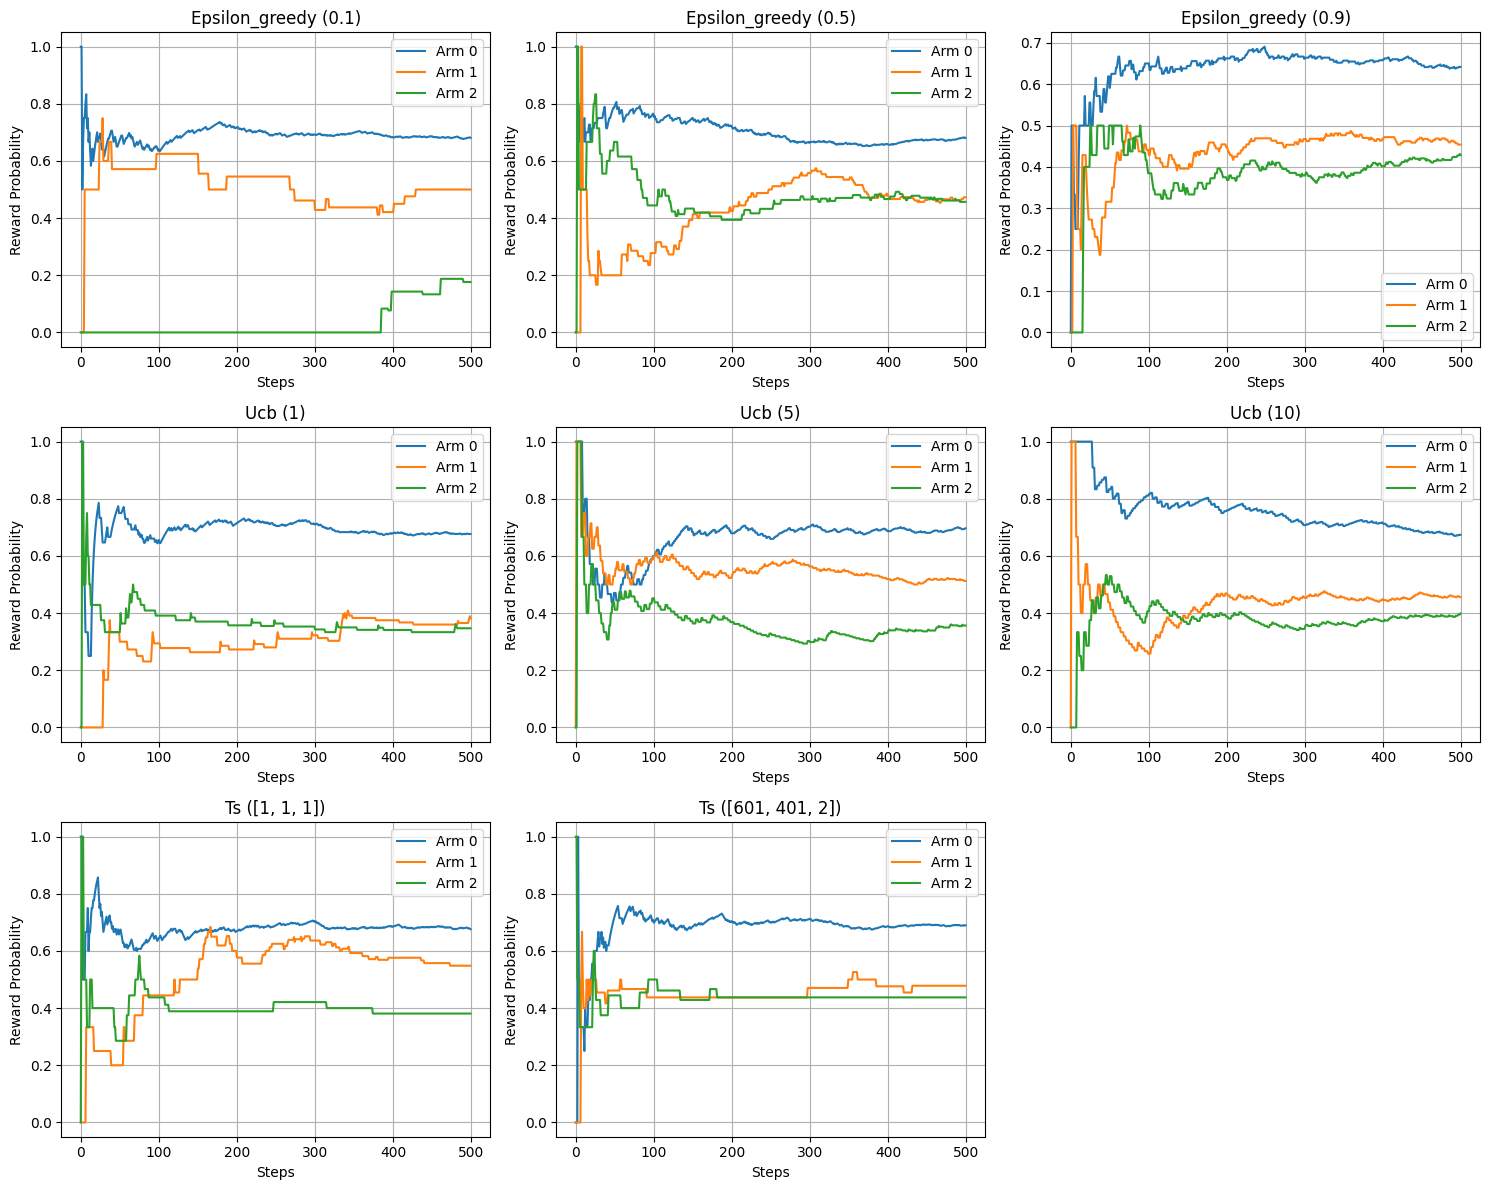

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成中奖概率的函数
def plot_arm_reward_probability(algorithms_params, N=500, num_trials=20):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 三行三列子图
    axs = axs.flatten()  # 将2D数组变为1D，方便后续操作

    plot_idx = 0  # 用于控制子图位置

    # 遍历每种算法和对应的参数
    for i, (alg_name, params) in enumerate(algorithms_params.items()):
        for j, param in enumerate(params):
            reward_probabilities = np.zeros((N, 3))  # 用于记录每一步拉臂后的中奖概率

            for trial in range(num_trials):
                # 初始化不同的Bandit算法
                if alg_name == 'epsilon_greedy':
                    bandit = EpsilonGreedy(epsilon=param)
                elif alg_name == 'ucb':
                    bandit = UCB(c=param)
                elif alg_name == 'ts':
                    alpha = [1, 1, 1]  # 设置每个臂的默认alpha
                    beta = [1, 1, 1]   # 设置每个臂的默认beta
                    bandit = ThompsonSampling(alpha=alpha, beta=beta)

                arm_counts = np.zeros(3)  # 用于记录每个臂的选择次数
                arm_rewards = np.zeros(3)  # 用于记录每个臂的累计奖励
                for t in range(N):
                    arm = bandit.select_arm()
                    reward = bandit.pull(arm)
                    bandit.update(arm, reward)
                    arm_rewards[arm] += reward
                    arm_counts[arm] += 1

                    # 计算当前时刻每个臂的中奖概率
                    reward_probabilities[t,arm] = arm_rewards[arm] / arm_counts[arm]
                    if arm == 0:
                        if arm_counts[arm + 1] != 0 and arm_counts[arm + 2] != 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm + 2] = arm_rewards[arm + 2] / arm_counts[arm + 2]
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm + 2] != 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm + 2] = arm_rewards[arm + 2] / arm_counts[arm + 2]
                        elif arm_counts[arm + 1] != 0 and arm_counts[arm + 2] == 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm + 2] = 0
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm + 2] == 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm + 2] = 0

                    elif arm == 1:
                        if arm_counts[arm + 1] != 0 and arm_counts[arm - 1] != 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm - 1] != 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                        elif arm_counts[arm + 1] != 0 and arm_counts[arm - 1] == 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm - 1] = 0
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm - 1] == 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm - 1] = 0

                    elif arm == 2:
                        if arm_counts[arm - 1] != 0 and arm_counts[arm - 2] != 0:
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                            reward_probabilities[t,arm - 2] = arm_rewards[arm - 2] / arm_counts[arm - 2]
                        elif arm_counts[arm - 1] == 0 and arm_counts[arm - 2] != 0:
                            reward_probabilities[t,arm - 1] = 0
                            reward_probabilities[t,arm - 2] = arm_rewards[arm - 2] / arm_counts[arm - 2]
                        elif arm_counts[arm - 1] != 0 and arm_counts[arm - 2] == 0:
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                            reward_probabilities[t,arm - 2] = 0
                        elif arm_counts[arm - 1] == 0 and arm_counts[arm - 2] == 0:
                            reward_probabilities[t,arm - 1] = 0
                            reward_probabilities[t,arm - 2] = 0


            # 绘制每个参数下的图像
            axs[plot_idx].plot(reward_probabilities)
            axs[plot_idx].set_title(f"{alg_name.capitalize()} ({param})")
            axs[plot_idx].set_xlabel("Steps")
            axs[plot_idx].set_ylabel("Reward Probability")
            axs[plot_idx].legend([f"Arm {k}" for k in range(3)])
            axs[plot_idx].grid(True)

            plot_idx += 1  # 更新子图索引

    # 删除最后多余的空白子图（仅适用于最后一个算法的情况）
    for i in range(plot_idx, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()  # 自动调整子图布局
    plt.show()

# 定义每种算法的参数
algorithms_params = {
    'epsilon_greedy': [0.1, 0.5, 0.9],
    'ucb': [1, 5, 10],
    'ts': [
        [1, 1, 1],  # alpha, beta
        [601, 401, 2]  # alpha, beta
    ]
}

# 生成图像
plot_arm_reward_probability(algorithms_params)


We find that as the number of pulling times increases, the estimated value we get is closer to the true value, which proves the validity of our experiment. At the same time, we also find that in Epsilon-greedy algorithm, when epsilon is small (equal to 0.1 in this case), the probability estimate obtained is not accurate, which is in line with our intuition, and we are more inclined to select the value we currently think is most likely to win, ignoring the importance of exploration. This also tells us that we should balance the relationship between exploration and application, and carry out rational updates in the course of continuous exploration, which will allow us to obtain accurate probability estimation and be more conducive to our application.

## Problem 4

In [7]:
print("epsilon = 0.1   reward_gap: ", results_rewards['epsilon_greedy'][0]-3500)
print("epsilon = 0.5   reward_gap: ", results_rewards['epsilon_greedy'][1]-3500)
print("epsilon = 0.9   reward_gap: ", results_rewards['epsilon_greedy'][2]-3500)
print("c = 1           reward_gap: ", results_rewards['ucb'][0]-3500)
print("c = 5           reward_gap: ", results_rewards['ucb'][1]-3500)
print("c = 10          reward_gap: ", results_rewards['ucb'][2]-3500)
print("alpha = [1,1,1] beta = [1,1,1] reward_gap: ", results_rewards['ts'][0]-3500)
print("alpha = [601,401,2] beta = [401,601,3] reward_gap: ", results_rewards['ts'][1]-3500)

epsilon = 0.1   reward_gap:  -87.51000000000022
epsilon = 0.5   reward_gap:  -422.2550000000001
epsilon = 0.9   reward_gap:  -752.8649999999998
c = 1           reward_gap:  -89.49499999999989
c = 5           reward_gap:  -519.2849999999999
c = 10          reward_gap:  -671.315
alpha = [1,1,1] beta = [1,1,1] reward_gap:  -18.13500000000022
alpha = [601,401,2] beta = [401,601,3] reward_gap:  -9.809999999999945


We calculated the gap between them and the oracle value using the expectations obtained above.

### 0  Comparison between different algorithms

#### Summary of the above results

##### $\epsilon$-greedy algorithm

From the data obtained in our experiment, we can find that the score of Epsilon-greedy algorithm is very small when epsilon is large, which conforms to our cognition, but it still maintains exploration in the later stage and ignores the information already obtained.

##### UCB algorithm

The UCB algorithm has the highest score when c=1, but it is not stable from the variance observation.

##### TS algorithm

When we modify the two parameters of the TS algorithm, their scores and variances will change, which means that we get different prior information, which also inspires us to obtain a better scheme by modifying the prior information.

It is found from the above that when the prior of beta and alpha is set, the expected value obtained is the highest and closest to the ideal value. For Epsilon-greedy algorithm, the value of epsilon is small, and its expected value is also relatively high and approaches the ideal value, while the gap between UCB algorithm and the ideal value is the largest.But we found that none of them reached the ideal value (3,500).

### 1 Exploration of Algorithm

#### 1.1 Further exploration of $\epsilon$ - greedy Algorithm

What we've done before is treat $\epsilon$ as a constant:[0.1, 0.5, 0.9], but we can think about it in two ways; The first point is: by changing the values of different epsilon, but requiring the value interval to be reduced, more epsilon values can be calculated, and the influence of different epsilon values on reward can be carefully calculated. Second, we can set epsilon as a function of t, that is, our exploration strategy is constantly changing and iterating and this case is real in life .Because we can look at it on a case-by-case basis and change our strategy based on current results, so as to explore and optimize the algorithm.

##### 1.1(1) set different epsilon constant

Before we set $\epsilon$ = [0.1,0.5,0.9] , this case we set 50 different values from 0.05 to 0.9(we set values from 0.05 to 0.9 because we can keep it effective)

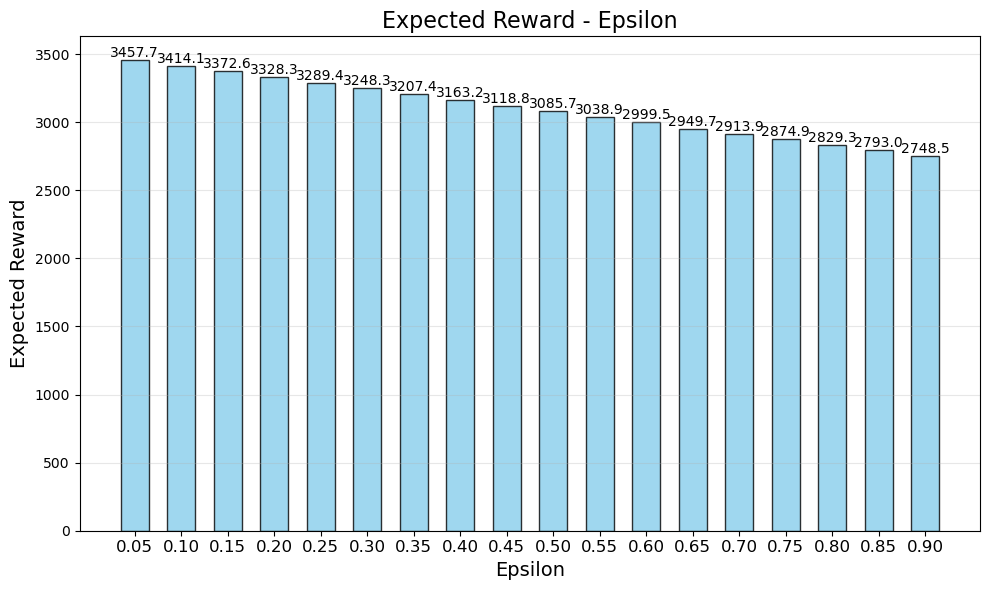

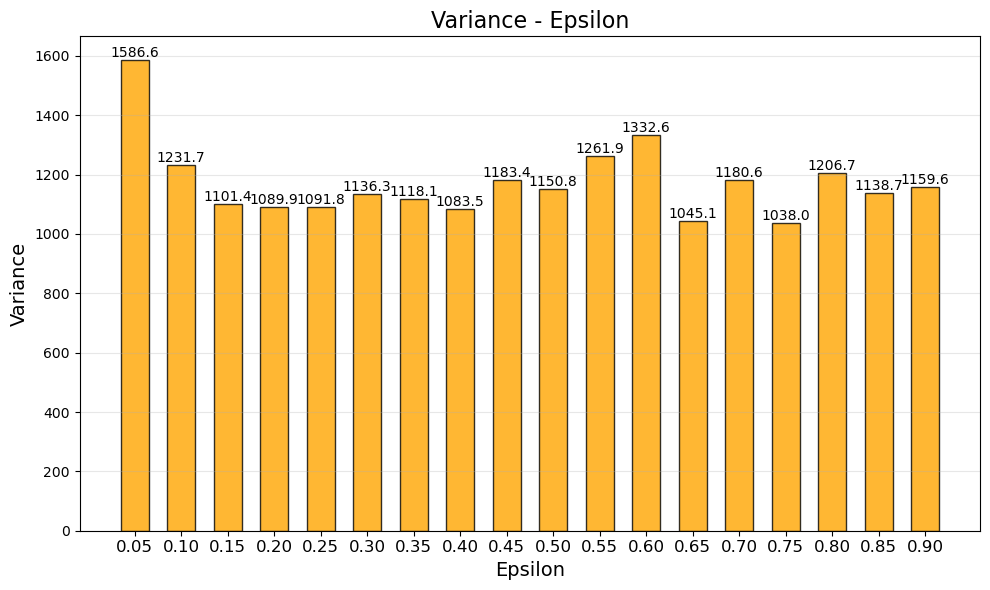

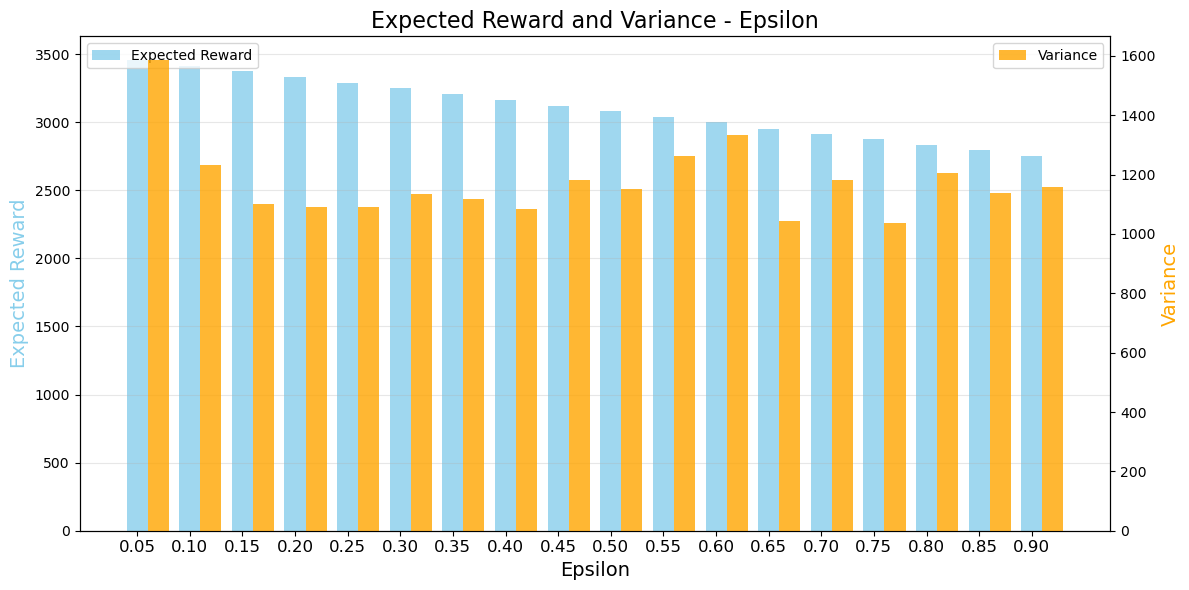

In [64]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
epsilons = np.arange(0.05, 0.95, 0.05) 
results_rewards = {
    'epsilon_greedy': [],
}
results_variances = {
    'epsilon_greedy': [],
}
epsilon_rewards = {epsilon: [] for epsilon in epsilons}  # 用于记录每个epsilon下的奖励数据

# 进行实验
for epsilon in epsilons:
    cumulative_rewards = 0
    trial_rewards_list = []

    for _ in range(num_trials):
        bandit = EpsilonGreedy(epsilon=epsilon)
        rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            cumulative_rewards += reward
            rewards.append(reward)  # 存储每次的奖励

        trial_rewards_list.append(np.sum(rewards))

    # 计算平均奖励和方差，并保留一位小数
    avg_reward = round(cumulative_rewards / num_trials, 1)
    variance = round(np.var(trial_rewards_list), 1)

    results_rewards['epsilon_greedy'].append(avg_reward)
    results_variances['epsilon_greedy'].append(variance)
    epsilon_rewards[epsilon] = rewards  # 存储此epsilon下的奖励数据

# 生成只有期望奖励的图像
def plot_expectation(means, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        plt.text(bar_positions[i], mean + 0.01, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Expected Reward", fontsize=14)
    plt.title(f"Expected Reward - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成只有方差的图像
def plot_variance(variances, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        plt.text(bar_positions[i], variance + 0.01, f"{variance:.1f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title(f"Variance - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(means, variances, param_values, param_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_positions = np.arange(len(param_values))  # 柱子的位置
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax1.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels([f"{epsilon:.2f}" for epsilon in param_values], fontsize=12)
    ax1.set_xlabel(f"{param_name.capitalize()}", fontsize=14)
    ax1.set_ylabel("Expected Reward", fontsize=14, color='skyblue')
    ax1.set_title("Expected Reward and Variance - Epsilon", fontsize=16)
    ax1.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax1.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    ax2.set_ylabel("Variance", fontsize=14, color='orange')

    # 显示图例
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 显示图像
    plt.show()

# 绘制期望奖励图（显示每个柱状图的值）
plot_expectation(results_rewards['epsilon_greedy'], epsilons, "epsilon")

# 绘制方差图（显示每个柱状图的值）
plot_variance(results_variances['epsilon_greedy'], epsilons, "epsilon")

# 绘制期望奖励与方差合成图（去掉数值标注）
plot_combined(results_rewards['epsilon_greedy'], results_variances['epsilon_greedy'], epsilons, "epsilon")


We find that when epsilon tends to 0.1, it has the highest expected score, but the variance is large and the stability is insufficient, which is caused by ignoring exploration.

In addition, we found that as epsilon increases, the expected score decreases, which is due to over-exploration.

##### Expansion

In order to study the situation when $\epsilon$ is very small, we set 0.001 to 0.01 with 0.001 as the gap for the experiment

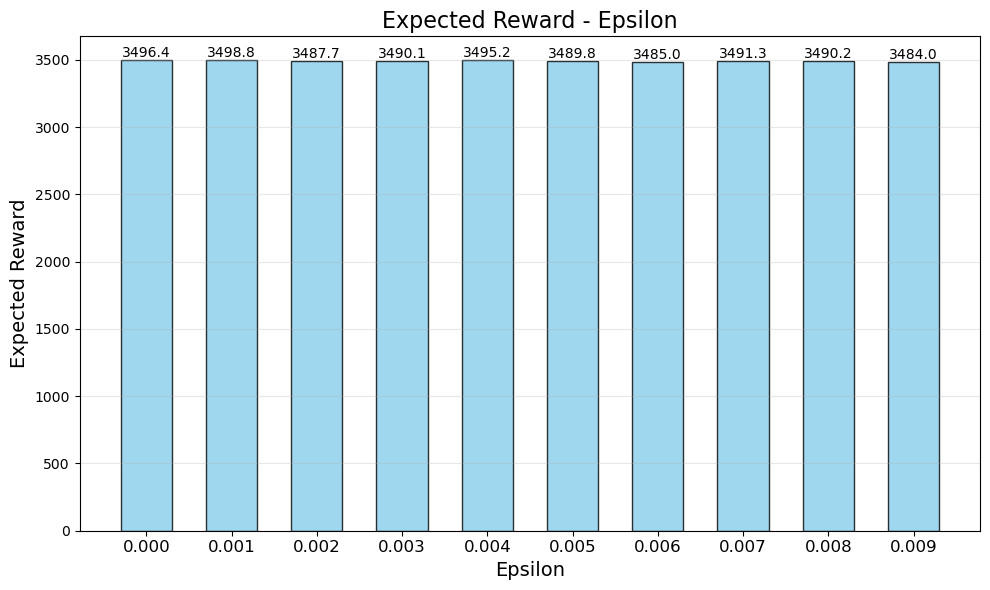

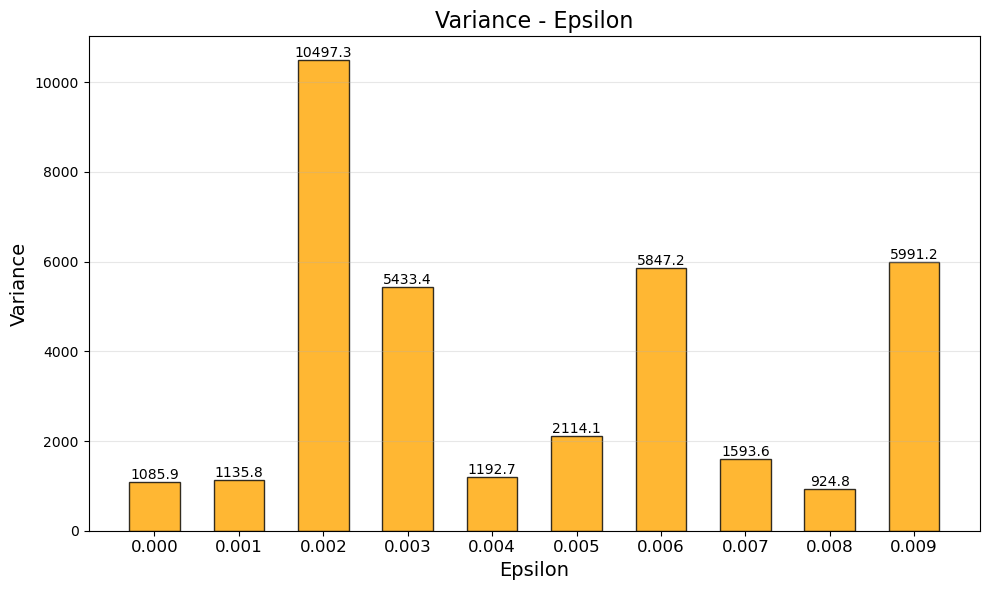

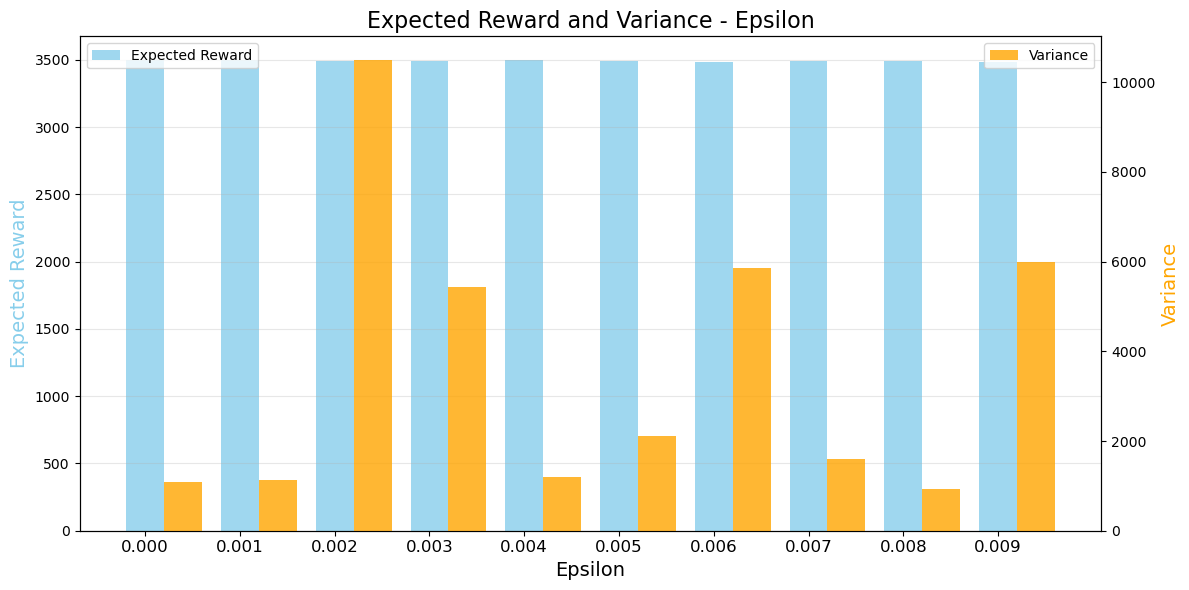

In [65]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
epsilons = np.arange(0, 0.01, 0.001) 
results_rewards = {
    'epsilon_greedy': [],
}
results_variances = {
    'epsilon_greedy': [],
}
epsilon_rewards = {epsilon: [] for epsilon in epsilons}  # 用于记录每个epsilon下的奖励数据

# 进行实验
for epsilon in epsilons:
    cumulative_rewards = 0
    trial_rewards_list = []

    for _ in range(num_trials):
        bandit = EpsilonGreedy(epsilon=epsilon)
        rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            cumulative_rewards += reward
            rewards.append(reward)  # 存储每次的奖励

        trial_rewards_list.append(np.sum(rewards))

    # 计算平均奖励和方差，并保留一位小数
    avg_reward = round(cumulative_rewards / num_trials, 1)
    variance = round(np.var(trial_rewards_list), 1)

    results_rewards['epsilon_greedy'].append(avg_reward)
    results_variances['epsilon_greedy'].append(variance)
    epsilon_rewards[epsilon] = rewards  # 存储此epsilon下的奖励数据

# 生成只有期望奖励的图像
def plot_expectation(means, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        plt.text(bar_positions[i], mean + 0.01, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.3f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Expected Reward", fontsize=14)
    plt.title(f"Expected Reward - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成只有方差的图像
def plot_variance(variances, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        plt.text(bar_positions[i], variance + 0.01, f"{variance:.1f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.3f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title(f"Variance - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(means, variances, param_values, param_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_positions = np.arange(len(param_values))  # 柱子的位置
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax1.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels([f"{epsilon:.3f}" for epsilon in param_values], fontsize=12)
    ax1.set_xlabel(f"{param_name.capitalize()}", fontsize=14)
    ax1.set_ylabel("Expected Reward", fontsize=14, color='skyblue')
    ax1.set_title("Expected Reward and Variance - Epsilon", fontsize=16)
    ax1.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax1.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    ax2.set_ylabel("Variance", fontsize=14, color='orange')

    # 显示图例
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 显示图像
    plt.show()

# 绘制期望奖励图（显示每个柱状图的值）
plot_expectation(results_rewards['epsilon_greedy'], epsilons, "epsilon")

# 绘制方差图（显示每个柱状图的值）
plot_variance(results_variances['epsilon_greedy'], epsilons, "epsilon")

# 绘制期望奖励与方差合成图（去掉数值标注）
plot_combined(results_rewards['epsilon_greedy'], results_variances['epsilon_greedy'], epsilons, "epsilon")


We find that the expected score is unstable when $\epsilon$ is small, and we think that changing the probability of winning each arm may lead to a new trend in the expected score as $\epsilon$becomes larger.

##### 1.1(2) set epsilon as a function of t 

In order to make our strategy more in line with the reality, we decided to set epsilon's function of t. Our initial idea was to set epsilon to decrease as t increased. The purpose of this is that as the experiment continues, in order to maximize the benefit, we always choose the arm with the highest probability to pull, which is intuitively in line with our cognition.

note: we must keep $\epsilon$ between 0 and 1


(1) linear:  $\epsilon(t)$ =  0.9 - $0.00016*t$ (in this case,we can keep $\epsilon$ between 0.1 and 0.9)


(2) exponential:  $\epsilon(t)$ = $0.8*e^{-0.5t} + 0.1$ 

(3) inverse： $\epsilon(t)$ = 0.8*$\frac{1}{t}+0.1$ (when t = 0, we let $\epsilon$ = 0.9)

(4) cubic : $\epsilon(t)$ = $\frac{0.8}{t^{3}+t^{2}+t+1}$ + 0.1

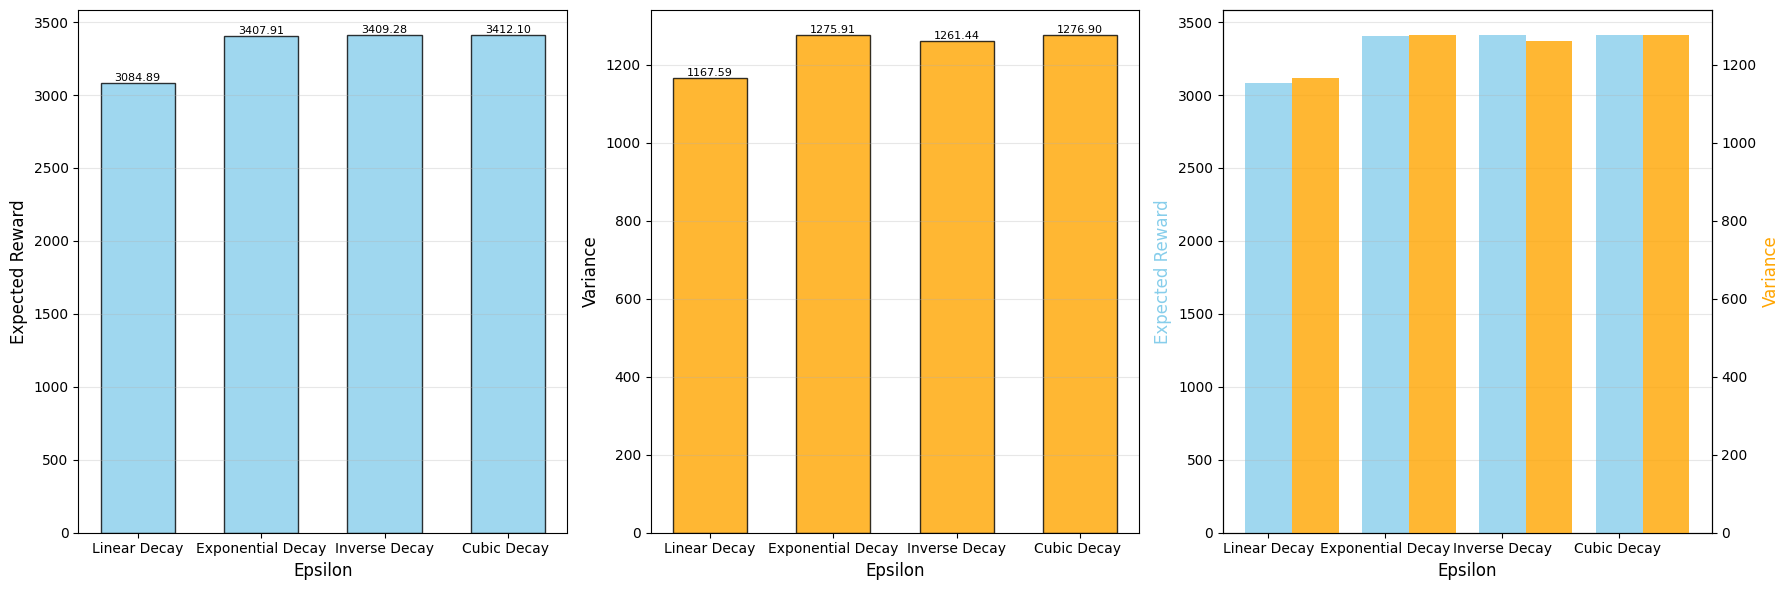

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 epsilon 函数
def epsilon_linear(t):
    return max(0.1, 0.9 - 0.00016 * t)  # 确保 epsilon 不低于 0.1

def epsilon_exponential(t):
    return 0.8 * np.exp(-0.5*t ) + 0.1  # t 除以 1000 缩放，确保衰减更平缓

def epsilon_inverse(t):
    return 0.8 / max(1, t) + 0.1 # 避免 t 为 0 的情况

def epsilon_cubic(t):
    return 0.8 / ((t+1)*(t+1)*(t+1)) + 0.1

# 定义实验参数
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
epsilon_functions = {
    "Linear Decay": epsilon_linear,
    "Exponential Decay": epsilon_exponential,
    "Inverse Decay": epsilon_inverse,
    "Cubic Decay ": epsilon_cubic,
}

results_rewards = []
results_variances = []

# 假设您已经定义好了 EpsilonGreedy 类
# 直接引用已有的 EpsilonGreedy 类
# 以下是实验部分
for name, epsilon_func in epsilon_functions.items():
    cumulative_rewards = 0
    all_rewards = []  # 用于记录每个实验的所有奖励数据

    for _ in range(num_trials):
        bandit = EpsilonGreedy(epsilon=epsilon_func(0))  # 初始化时设置为 0，可以在每次选择臂时动态更新
        rewards = []
        for t in range(N):
            epsilon_t = epsilon_func(t)  # 每次尝试时计算新的 epsilon
            bandit.modify_parameter(epsilon_t)  # 更新 epsilon
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            cumulative_rewards += reward
            rewards.append(reward)
        all_rewards.append(np.sum(rewards))
    # 计算期望和方差
    avg_reward = cumulative_rewards / num_trials
    variance = np.var(all_rewards)
    results_rewards.append(avg_reward)
    results_variances.append(variance)

# 生成期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(bar_positions)

    ax.set_xticklabels(param_values, fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(bar_positions)

    ax.set_xticklabels(param_values, fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(param_values, fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 3 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 绘制每个算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards, list(epsilon_functions.keys()), "epsilon")
plot_variance(axs[1], results_variances, list(epsilon_functions.keys()), "epsilon")
plot_combined(axs[2], results_rewards, results_variances, list(epsilon_functions.keys()), "epsilon")

plt.tight_layout()
plt.show()


Through the image, we find that the cubic function has high expectations, low variance, stability and efficiency, which is in line with our intuition: it combines exploration and application best. Like exponential function and inverse proportional function, they decline too fast and the exploration time is short. The effects of each experiment may be very different from one another, resulting in a large variance, indicating that they are not stable, but their scores also show that their effects are acceptable.Linear functions take too long to explore, so the expectation is minimal.Even if its variance is small, it is not worth adopting.

We keep $\epsilon$ at 0.1 to 0.9 by adding constant terms to the exponential and inverse functions

#### 1.2 Further exploration of UCB Algorithm

We know that in the UCB algorithm, we balance the relationship between exploration and exploitation by changing the value of the incoming $I (t)$. However, the value of c may be different. We can measure its influence on our experiment by changing the value of $c$. Below, I set up an experiment to test the influence of c value on UCB algorithm

##### 1.2(1) Suppose c is different positive constant.

Below, we will change the value of c (but always ensure that it is positive) to measure the effect of different values of c on the final expectation and variance.

(1) $c$ = $0.1$

(2) $c$ = $0.5$

(3) $c$ = $1$

(4) $c$ = $2$

(5) $c$ = $20$ 

c = 0.1   reward: 3211.41   variances: 241932.20
c = 0.5   reward: 3468.93   variances: 1107.99
c = 1   reward: 3410.24   variances: 1247.23
c = 2   reward: 3262.49   variances: 1279.91
c = 20   reward: 2741.11   variances: 1207.54


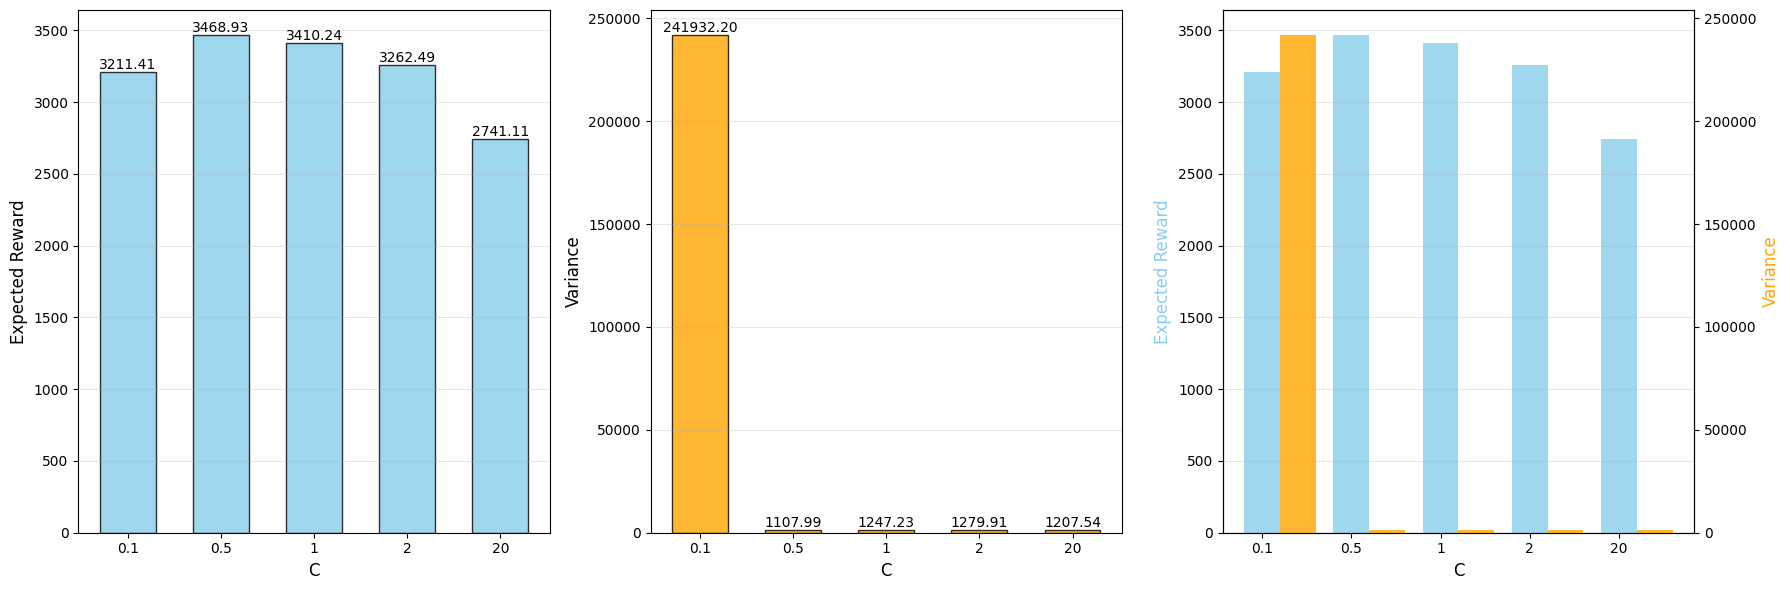

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经声明的类 Bandit, UCB 等已经在之前的代码中存在，直接使用它们。

# 设置实验参数
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
c_values = [0.1, 0.5, 1, 2, 20]  # c值分别为0.5，2，5
results_rewards = {'ucb': []}
results_variances = {'ucb': []}

# 对每个c值进行实验
for c in c_values:
    cumulative_rewards = 0
    trial_rewards_list = []  # 用于记录每次实验的奖励

    for _ in range(num_trials):
        bandit = UCB(c=c)  # 创建UCB对象
        trial_rewards = []
        
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)  # 记录奖励
            cumulative_rewards += reward

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ucb'].append(mean_reward)
    results_variances['ucb'].append(variance_reward)

# 输出结果
for i, c in enumerate(c_values):
    print(f"c = {c}   reward: {results_rewards['ucb'][i]:.2f}   variances: {results_variances['ucb'][i]:.2f}")

# 绘制期望奖励图
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=10)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"{val}" for val in param_values], fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差图
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=10)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"{val}" for val in param_values], fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    ax.set_xticklabels([f"{val}" for val in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')


# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 绘制期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards['ucb'], c_values, "c")
plot_variance(axs[1], results_variances['ucb'], c_values, "c")
plot_combined(axs[2], results_rewards['ucb'], results_variances['ucb'], c_values, "c")

# 调整布局并显示图像
plt.tight_layout()
plt.show()


We find that when c=0.1, its expectation is small and its variance is large; Guess the reason is: at this time we have the least interest in exploration, when we get the correct information at the beginning (which arm has the highest probability of scoring), then its expectation will be too large, and if not, it will go further and further down the wrong road, resulting in reduced expectations. This algorithm has no stability. According to our values, it is not difficult to find that the score expectation when c=0.5 is greater than the score expectation when c=1. We preliminarily infer that when c is between 0.1 and 1, there is a better score.

##### Exploration：when c between 0.1 and 1

Below I will set the c value with a spacing of 0.05 for our observation.

c = 0.10   reward: 3261   variances: 197279
c = 0.15   reward: 3385   variances: 92749
c = 0.20   reward: 3455   variances: 27435
c = 0.25   reward: 3476   variances: 10101
c = 0.30   reward: 3490   variances: 975
c = 0.35   reward: 3486   variances: 1257
c = 0.40   reward: 3481   variances: 883
c = 0.45   reward: 3476   variances: 975
c = 0.50   reward: 3474   variances: 1215
c = 0.55   reward: 3467   variances: 1311
c = 0.60   reward: 3457   variances: 1385
c = 0.65   reward: 3456   variances: 1180
c = 0.70   reward: 3454   variances: 1075
c = 0.75   reward: 3446   variances: 1188
c = 0.80   reward: 3439   variances: 1127
c = 0.85   reward: 3432   variances: 1034
c = 0.90   reward: 3426   variances: 1200
c = 0.95   reward: 3418   variances: 1223
c = 1.00   reward: 3410   variances: 1224


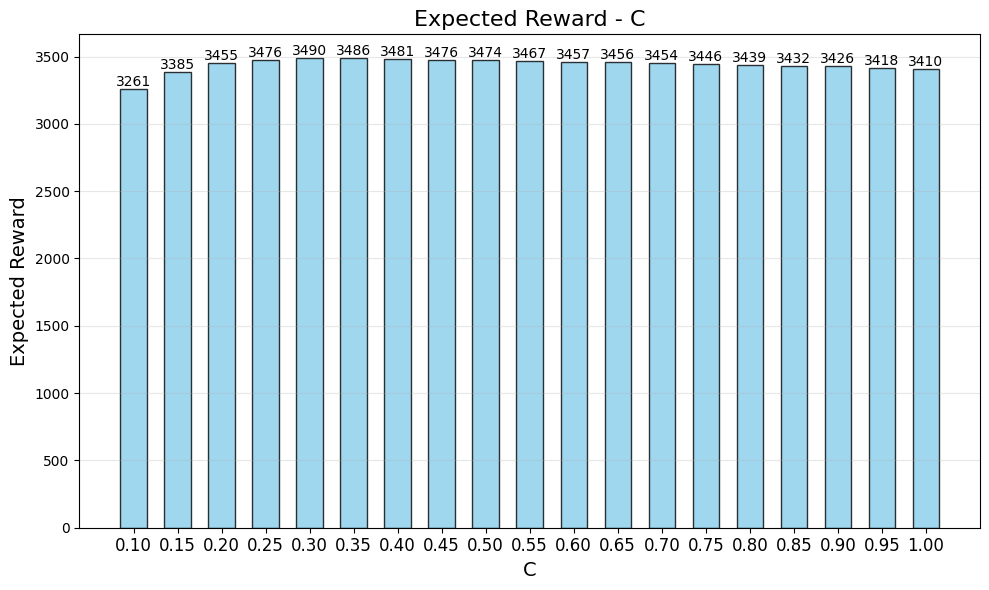

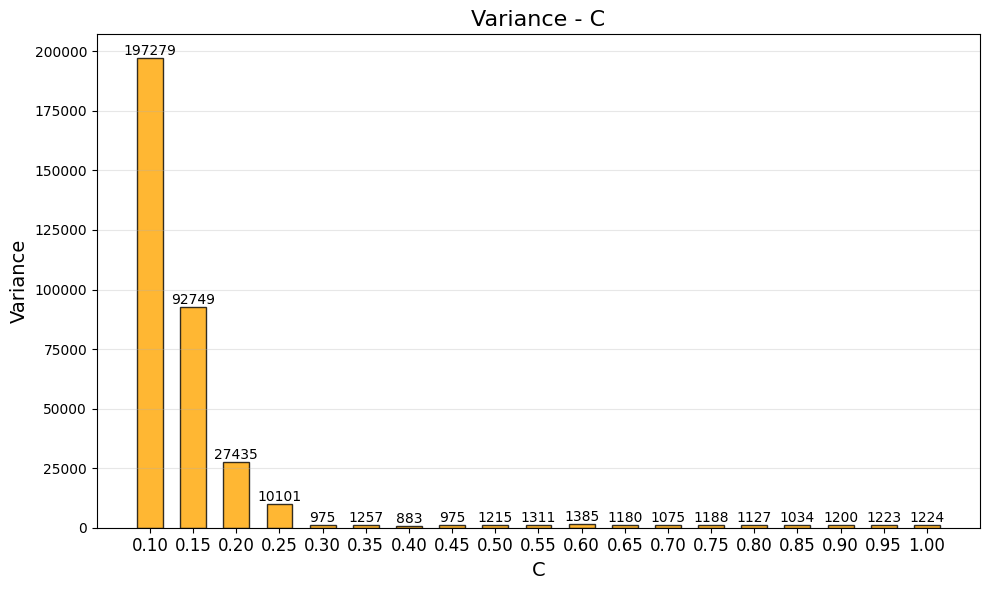

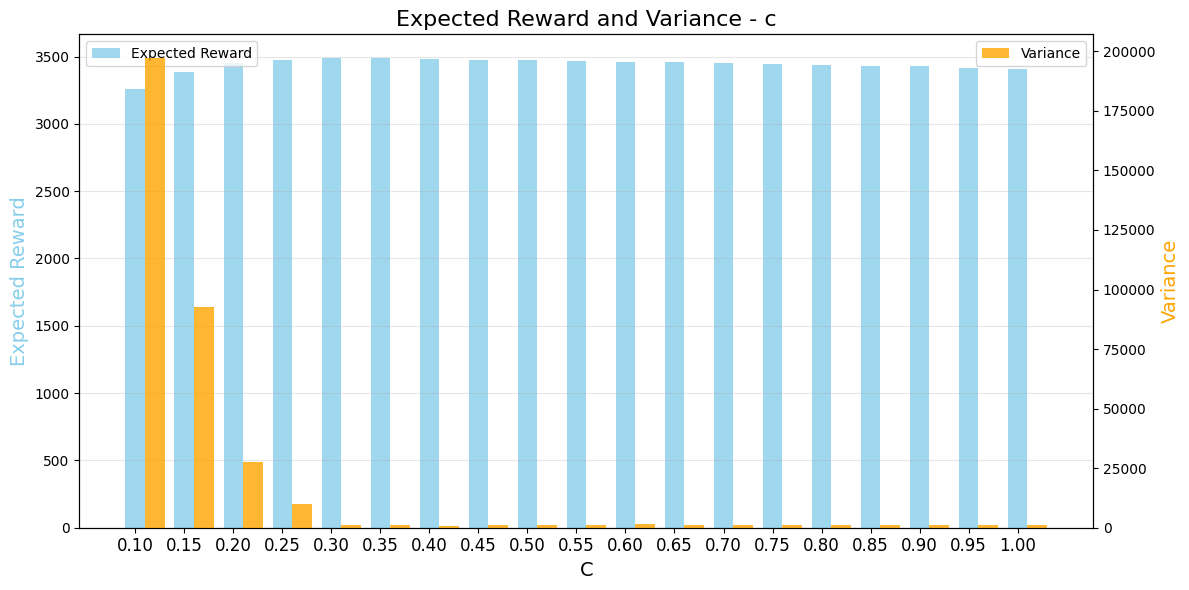

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经声明的类 UCB 等已经在之前的代码中存在，直接使用它们。

# 设置实验参数
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
c_values = np.arange(0.1, 1.05, 0.05)  # c值从0.1到1，步幅为0.05
results_rewards = {'ucb': []}
results_variances = {'ucb': []}

# 对每个c值进行实验
for c in c_values:
    cumulative_rewards = 0
    trial_rewards_list = []  # 用于记录每次实验的奖励

    for _ in range(num_trials):
        bandit = UCB(c=c)  # 创建UCB对象
        trial_rewards = []
        
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)  # 记录奖励
            cumulative_rewards += reward

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ucb'].append(mean_reward)
    results_variances['ucb'].append(variance_reward)

# 输出结果
for i, c in enumerate(c_values):
    print(f"c = {c:.2f}   reward: {int(results_rewards['ucb'][i])}   variances: {int(results_variances['ucb'][i])}")

# 绘制期望奖励图
def plot_expectation(means, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        plt.text(bar_positions[i], mean + 0.01, f"{int(mean)}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Expected Reward", fontsize=14)
    plt.title(f"Expected Reward - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 绘制方差图
def plot_variance(variances, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        plt.text(bar_positions[i], variance + 0.01, f"{int(variance)}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title(f"Variance - {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(means, variances, param_values, param_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_positions = np.arange(len(param_values))  # 柱子的位置
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax1.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels([f"{val:.2f}" for val in param_values], fontsize=12)
    ax1.set_xlabel(f"{param_name.capitalize()}", fontsize=14)
    ax1.set_ylabel("Expected Reward", fontsize=14, color='skyblue')
    ax1.set_title("Expected Reward and Variance - c", fontsize=16)
    ax1.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax1.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=14, color='orange')

    # 显示图例
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 显示图像
    plt.show()

# 绘制期望奖励图（显示每个柱状图的值）
plot_expectation(results_rewards['ucb'], c_values, "c")

# 绘制方差图（显示每个柱状图的值）
plot_variance(results_variances['ucb'], c_values, "c")

# 绘制期望奖励与方差合成图（去掉数值标注）
plot_combined(results_rewards['ucb'], results_variances['ucb'], c_values, "c")


We find that when c is 0.25, its expected score is the largest, but the variance is also larger than 0.3, and its algorithm is not stable enough. While when c is equal to 0.3, although the expected score is smaller than the expected score when c is equal to 0.25, the variance is small and the algorithm is stable.We can make a choice based on the actual situation.

##### 1.2(2) Suppose c is a function of t

In the UCB algorithm, the term containing c is positively correlated with our acceptance of exploration (the degree of exploration), that is, the more we support exploration, the larger the value of c will be. In real life, our strategy will change dynamically. For example, we may support exploration in the early stage, but with the progress of the experiment, we acquire a lot of information and have a preliminary understanding and speculation about the experiment, that is, we have a speculation about which arm is more likely to win the prize. At this time, we can reduce our interest in exploration and turn to maximize our interests. Therefore, in the experiment, we should also set c as a function of t.

(1) $c(t)$ = -0.001*$t$ + 5.1

(2) $c(t)$ = $ln(\frac{1}{t+1})$ + 9(because we keep c positive)

(3) $c(t)$ = $-ln(\frac{1}{t+1})$

(4) $c(t)$ = $e^{0.001*t}$

c1 reward: 3289.49   variances: 1190.72
c2 reward: 3390.82   variances: 1219.18
c3 reward: 2853.03   variances: 1184.94
c4 reward: 2676.18   variances: 1194.57


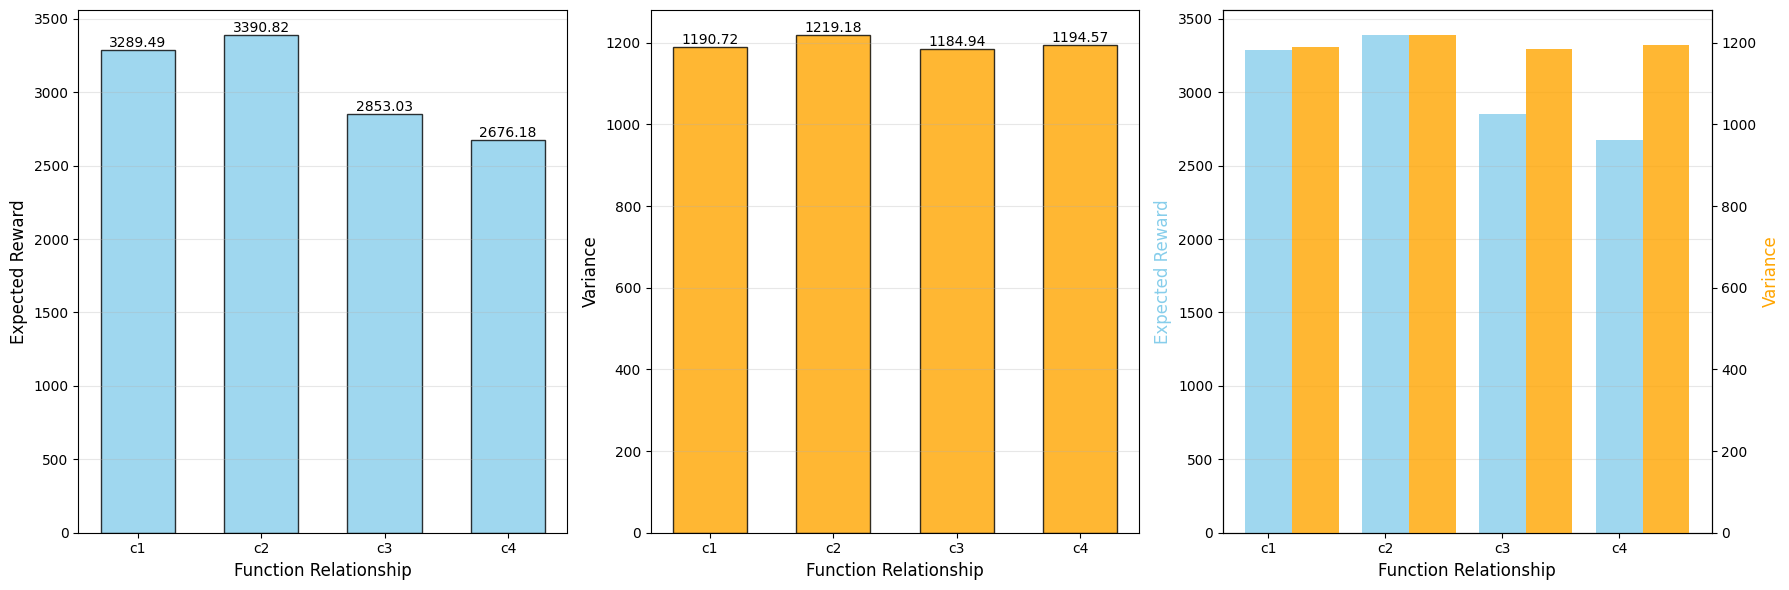

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp

# 假设您已经声明的类 Bandit, UCB 等已经在之前的代码中存在，直接使用它们。

# 设置实验参数
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
t_values = np.arange(1, N + 1)  # 时间步数 t 从 1 到 N

# 定义四个函数关系式
def c1(t):
    return -0.001 * t + 5.1

def c2(t):
    return np.log(1 / (t + 1)) + 9  # 保持 c(t) 为正数

def c3(t):
    return -np.log(1 / (t + 1))

def c4(t):
    return np.exp(0.001 * t)

# 存储结果
results_rewards = {'c1': [], 'c2': [], 'c3': [], 'c4': []}
results_variances = {'c1': [], 'c2': [], 'c3': [], 'c4': []}

# 对每个函数进行实验
for c_func, c_label in zip([c1, c2, c3, c4], ['c1', 'c2', 'c3', 'c4']):
    cumulative_rewards = 0
    trial_rewards_list = []  # 用于记录每次实验的奖励

    for _ in range(num_trials):
        bandit = UCB(c=c_func(1))  # 初始时给定c(t=1)
        trial_rewards = []
        
        for t in t_values:
            c_t = c_func(t)  # 获取当前时间步 t 对应的 c(t)
            bandit.c = c_t  # 更新UCB中的c值
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)  # 记录奖励
            cumulative_rewards += reward

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards[c_label].append(mean_reward)
    results_variances[c_label].append(variance_reward)

# 输出结果
for c_label in ['c1', 'c2', 'c3', 'c4']:
    print(f"{c_label} reward: {results_rewards[c_label][0]:.2f}   variances: {results_variances[c_label][0]:.2f}")

# 绘制期望奖励图
def plot_expectation(ax, means, param_labels):
    bar_positions = np.arange(len(param_labels))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=10)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(param_labels, fontsize=10)
    ax.set_xlabel("Function Relationship", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差图
def plot_variance(ax, variances, param_labels):
    bar_positions = np.arange(len(param_labels))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=10)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(param_labels, fontsize=10)
    ax.set_xlabel("Function Relationship", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_labels):
    bar_positions = np.arange(len(param_labels))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(param_labels, fontsize=10)

    ax.set_xlabel("Function Relationship", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    ax2.set_ylabel("Variance", fontsize=12, color='orange')


# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 绘制期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], [results_rewards[c][0] for c in ['c1', 'c2', 'c3', 'c4']], ['c1', 'c2', 'c3', 'c4'])
plot_variance(axs[1], [results_variances[c][0] for c in ['c1', 'c2', 'c3', 'c4']], ['c1', 'c2', 'c3', 'c4'])
plot_combined(axs[2], [results_rewards[c][0] for c in ['c1', 'c2', 'c3', 'c4']], [results_variances[c][0] for c in ['c1', 'c2', 'c3', 'c4']], ['c1', 'c2', 'c3', 'c4'])

# 调整布局并显示图像
plt.tight_layout()
plt.show()


From the expectation graph, we can see that there is a strong advantage in keeping the spirit of exploration at the beginning and choosing the arm with the higher score at the end. As you can see from the variance graph, they have similar stability

##### Introduce confidence levels and confidence intervals

With Hoeffding Boun,we can get:

$reward \sim Bern(\hat{\theta})$

$u$:the mean of the distribution of reward,  
$\bar{u}$:$\frac{1}{n}\sum_{n} reward$,  
n:count(I(t))

max{$(b-a)$} = 1

$Pr(|u-\bar{u}|>\epsilon) = 2\delta <= 2e^{-\frac{2n\epsilon^{2}}{(b-a)^{2}}}<=2e^{-\frac{n\epsilon^{2}}{2}}$ 

let $\delta = e^{-\frac{n\epsilon^{2}}{2}}$,we can get:

$\epsilon = \sqrt{\frac{2}{n}*log(\frac{1}{\delta})}$

let $\frac{1}{\delta} = t$,we will get $\epsilon = \sqrt{\frac{2}{count}*log(t)}$

As we mentioned earlier, c can control how much we explore

And that explains, why is there an exploration and development part of this formula:  
$I(t) = argmax(\hat{\theta}+c*\sqrt{\frac{2log(t)}{count(j)}})$

##### Confidence invariant about control

$\epsilon = \sqrt{\frac{2}{n}*log(t)}$

so the supremum of $\delta$ is $e^{-2nc^{2}\frac{2log(t)}{n}}$

If we want to control that $\delta$ is constant, we want to control that $c^{2}*log(t)$ is constant, so we need to design a function of c with respect to t.

Assuming we make it equal to the constant w, then $w = c^{2}*log(t)$,$c = \sqrt{log(t)*w}$ ,when t < 4,we can make the parameters the same as the traditional UCB algorithm.  
$c$ should be positive.

#### 1.3 Further exploration of TS Algorithm

The discussion of the TS algorithm is more complicated than the previous two algorithms, we will consider the absolute and relative sizes of the two parameters, and then assume that they have a functional relationship with respect to t. In our opinion, these two parameters represent our understanding of the prior, which provides us with the prior information. Although this prior information is a guess, it is conducive to achieving a larger score in some cases. It is this prior information that makes the TS algorithm score the highest, and the prior information plays a positive role at this time. Below I'll explore whether this prior information can lead us to make bad choices and score fewer points.

By observing the TS algorithm, we can find that the larger the initial value of $\alpha$, means that we have obtained prior information: the more times we have successfully pulled this arm, and the larger the initial value of $\beta$, means that we have obtained prior information: the more times we have failed to pull this arm. Therefore, it is not difficult to see that a higher ratio of $\alpha$to $\beta$means that we have prior information: the higher the prior probability of success of pulling the arm. So it makes sense to study relative size.

We can change our prior information, for example, maybe the first arm knows more priors and the other arm knows less priors, detecting the impact of this situation. Secondly, we also need to examine the influence of the ratio of $\alpha$ and $\beta$ on the experiment, and also consider the influence of their absolute and relative sizes.

In order to make the prior information more reasonable, we try to ensure that their ratios are close to the probability of the original question.

##### Study the effect of absolute size

(1) [($\alpha_1$ = 700, $\beta_1$ = 300), ($\alpha_2$ = 500, $\beta_2$ = 500), ($\alpha_3$ = 400, $\beta_3$ = 600)]

(2) [($\alpha_1$ = 7, $\beta_1$ = 3), ($\alpha_2$ = 5, $\beta_2$ = 5), ($\alpha_3$ = 4, $\beta_3$ = 6)]

alpha = [700, 500, 400] beta = [300, 500, 600] reward: 3496.02 variances: 1180.66
alpha = [7, 5, 4] beta = [3, 5, 6] reward: 3483.16 variances: 1191.87


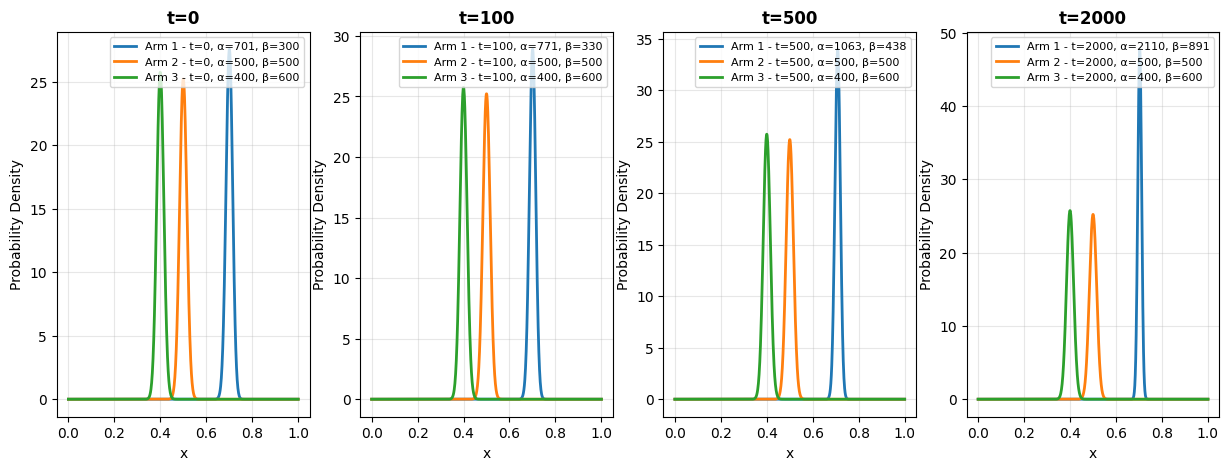

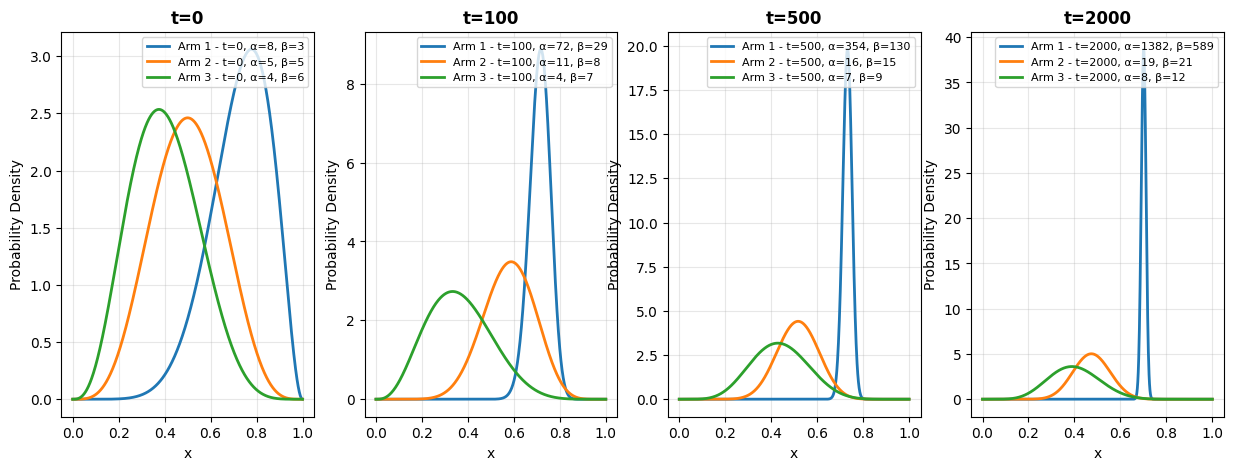

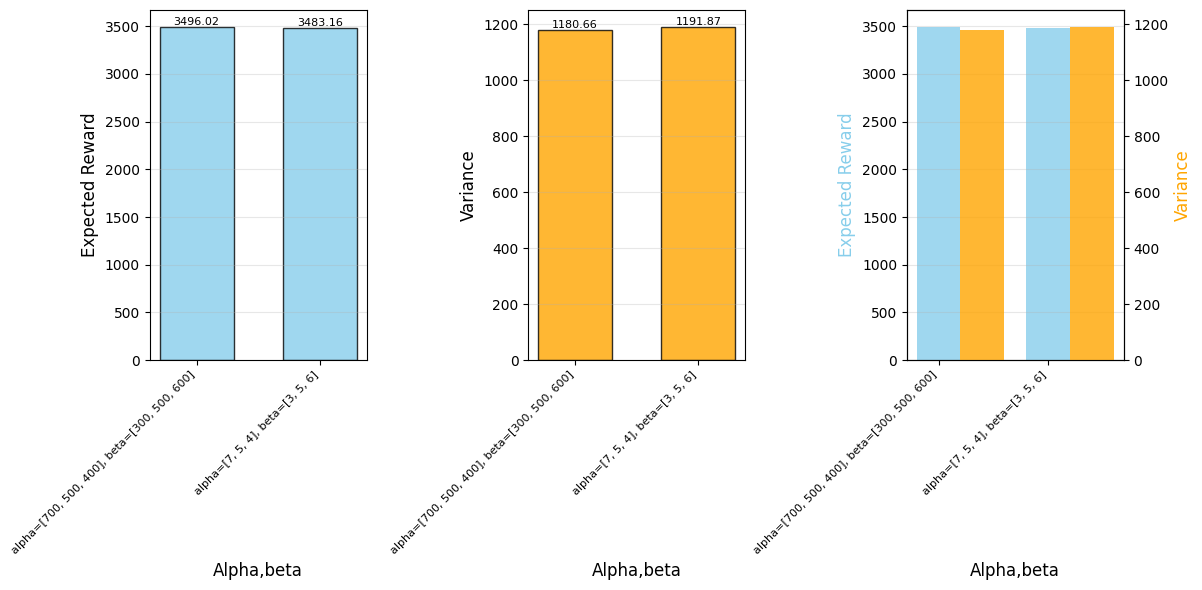

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 参数设置
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'ts': [
        ([700, 500, 400], [300, 500, 600]),  # 先验1
        ([7, 5, 4], [3, 5, 6])  # 先验2
    ]
}
results_rewards = {
    'ts': []
}
results_variances = {
    'ts': []
}

# 运行实验
for value in experiments['ts']:
    trial_rewards_list = []  # 用于记录每次实验的奖励
    cumulative_rewards = 0
    
    for trial_idx in range(num_trials):
        bandit = ThompsonSampling(alpha=value[0], beta=value[1])

        trial_rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)
            cumulative_rewards += reward

            # 每增加1000步绘制一次当前所有臂的Beta分布
            if trial_idx == num_trials - 1 and t in [0, 100, 500, 2000]:
                # 创建一个全局的图形（在循环外）
                if trial_idx == num_trials - 1 and t == 0:
                    # 计算出子图的数量，这里我们以2000步为间隔，最多绘制5个子图
                    num_subplots = 4  # 这里可以根据需要调整
                    fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))  # 每行放置多个子图

                x = np.linspace(0, 1, 1000)

                # 假设 t 取值为 0, 100, 500, 2000
                t_values = [0, 100, 500, 2000]

                # 映射 t 到对应的索引
                t_to_index = {0: 0, 100: 1, 500: 2, 2000: 3}

                # 绘制所有臂的Beta分布，每个时刻使用不同的颜色或线型
                for i, (alpha_param, beta_param) in enumerate(zip(bandit.alpha, bandit.beta)):
                    pdf = beta.pdf(x, alpha_param, beta_param)
                    axs_index = t_to_index[t]
                    axs[axs_index].plot(x, pdf, label=f"Arm {i+1} - t={t}, α={alpha_param}, β={beta_param}", 
                            linestyle='-' if (t in [0, 100, 500, 2000]) else '--', linewidth=2)

                # 设置标题、标签等
                axs[axs_index].set_title(f"t={t}", fontsize=12, weight='bold')
                axs[axs_index].set_xlabel('x', fontsize=10)
                axs[axs_index].set_ylabel('Probability Density', fontsize=10)
                axs[axs_index].grid(True, alpha=0.3)
                axs[axs_index].legend(loc='upper right', fontsize=8)

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ts'].append(mean_reward)
    results_variances['ts'].append(variance_reward)

# 打印结果
for idx, value in enumerate(experiments['ts']):
    print(f"alpha = {value[0]} beta = {value[1]} reward: {results_rewards['ts'][idx]:.2f} variances: {results_variances['ts'][idx]:.2f}")

# 绘制期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 绘制 TS 算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()


Compare the situation of (1) and (2) to observe the influence of absolute size on our expected score and stability.

Through experiments, we find that increasing the absolute size can make the algorithm more stable and help us get a better score while keeping the ratio unchanged and assuming that we know the prior information is correct.

##### What if there's something wrong with our prior information

(3) [($\alpha_1$ = 400, $\beta_1$ = 600), ($\alpha_2$ = 700, $\beta_2$ = 300), ($\alpha_3$ = 500, $\beta_3$ = 500)]

(4) [($\alpha_1$ = 4, $\beta_1$ = 6), ($\alpha_2$ = 7, $\beta_2$ = 3), ($\alpha_3$ = 5, $\beta_3$ = 5)]

alpha = [400, 700, 500] beta = [600, 300, 500] reward: 2494.41 variances: 1587.11
alpha = [4, 7, 5] beta = [6, 3, 5] reward: 3476.05 variances: 1168.63


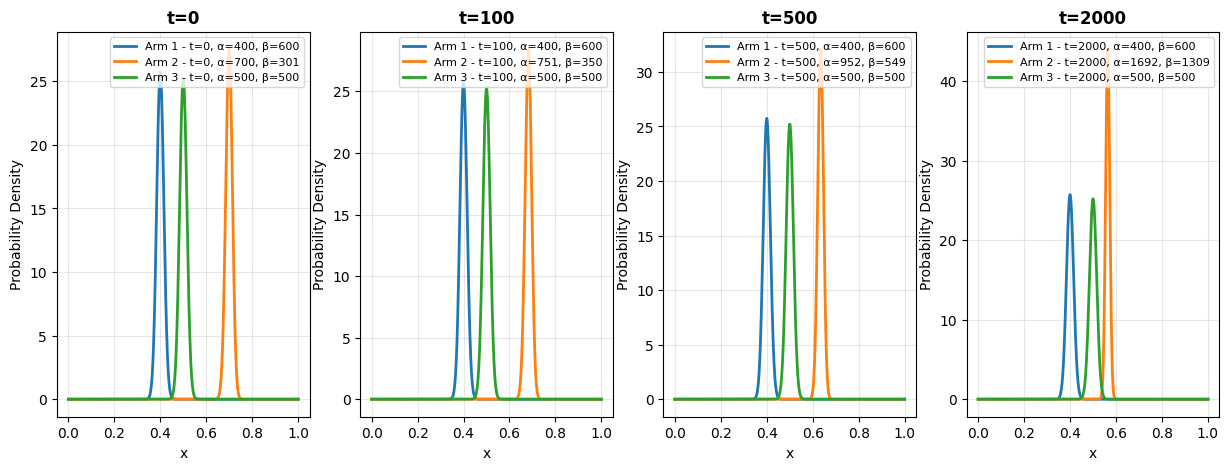

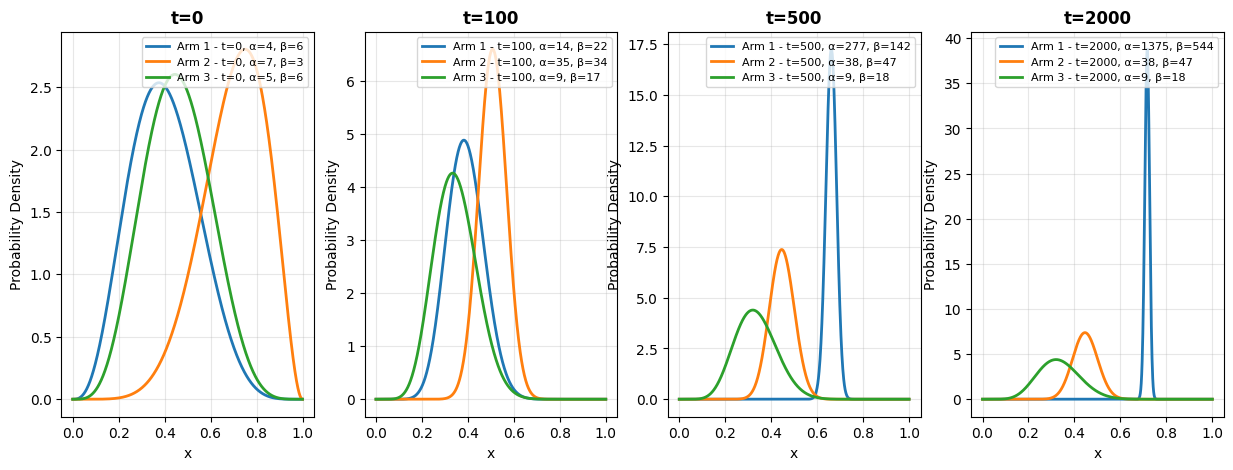

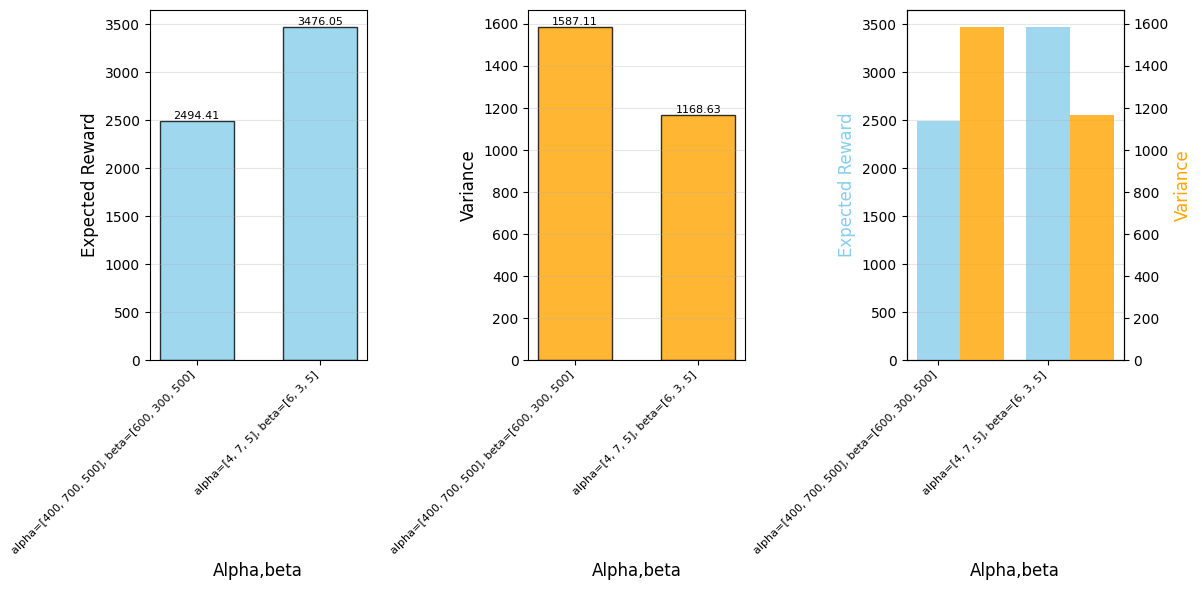

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'ts': [
        ([400, 700, 500], [600, 300,500]),  # 先验1
        ([4, 7, 5], [6, 3, 5])  # 先验2
    ]
}
results_rewards = {
    'ts': []
}
results_variances = {
    'ts': []
}

# 运行实验
for value in experiments['ts']:
    trial_rewards_list = []  # 用于记录每次实验的奖励
    cumulative_rewards = 0
    
    for trial_idx in range(num_trials):
        bandit = ThompsonSampling(alpha=value[0], beta=value[1])

        trial_rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)
            cumulative_rewards += reward

            # 每增加1000步绘制一次当前所有臂的Beta分布
            if trial_idx == num_trials - 1 and t in [0, 100, 500, 2000]:
                # 创建一个全局的图形（在循环外）
                if trial_idx == num_trials - 1 and t == 0:
                    # 计算出子图的数量，这里我们以2000步为间隔，最多绘制5个子图
                    num_subplots = 4  # 这里可以根据需要调整
                    fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))  # 每行放置多个子图

                x = np.linspace(0, 1, 1000)

                # 假设 t 取值为 0, 100, 500, 2000
                t_values = [0, 100, 500, 2000]

                # 映射 t 到对应的索引
                t_to_index = {0: 0, 100: 1, 500: 2, 2000: 3}

                # 绘制所有臂的Beta分布，每个时刻使用不同的颜色或线型
                for i, (alpha_param, beta_param) in enumerate(zip(bandit.alpha, bandit.beta)):
                    pdf = beta.pdf(x, alpha_param, beta_param)
                    axs_index = t_to_index[t]
                    axs[axs_index].plot(x, pdf, label=f"Arm {i+1} - t={t}, α={alpha_param}, β={beta_param}", 
                            linestyle='-' if (t in [0, 100, 500, 2000]) else '--', linewidth=2)

                # 设置标题、标签等
                axs[axs_index].set_title(f"t={t}", fontsize=12, weight='bold')
                axs[axs_index].set_xlabel('x', fontsize=10)
                axs[axs_index].set_ylabel('Probability Density', fontsize=10)
                axs[axs_index].grid(True, alpha=0.3)
                axs[axs_index].legend(loc='upper right', fontsize=8)

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ts'].append(mean_reward)
    results_variances['ts'].append(variance_reward)

# 打印结果
for idx, value in enumerate(experiments['ts']):
    print(f"alpha = {value[0]} beta = {value[1]} reward: {results_rewards['ts'][idx]:.2f} variances: {results_variances['ts'][idx]:.2f}")

# 绘制期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 绘制 TS 算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()


We find that when we increase the absolute size of the error prior information, then we greatly reduce the score expectation and decrease the stability. When the absolute size of the error information is small, it has less impact on the score expectation of the experiment. The reason is speculated: we have conducted multiple pull arms, and the error information accounts for a relatively small proportion in the total information.

##### Suppose we know only some prior information of the arm, or the other prior information of the arm is small relative to the relative size of the prior information of the arm

(5) [($\alpha_1$ = 700, $\beta_1$ = 300), ($\alpha_2$ = 5, $\beta_2$ = 5), ($\alpha_3$ = 4, $\beta_3$ = 6)]

(6) [($\alpha_1$ = 7, $\beta_1$ = 3), ($\alpha_2$ = 500, $\beta_2$ = 500), ($\alpha_3$ = 400, $\beta_3$ = 600)]

alpha = [700, 5, 4] beta = [300, 5, 6] reward: 3488.89 variances: 1131.09
alpha = [7, 500, 400] beta = [3, 500, 600] reward: 3501.55 variances: 1085.45


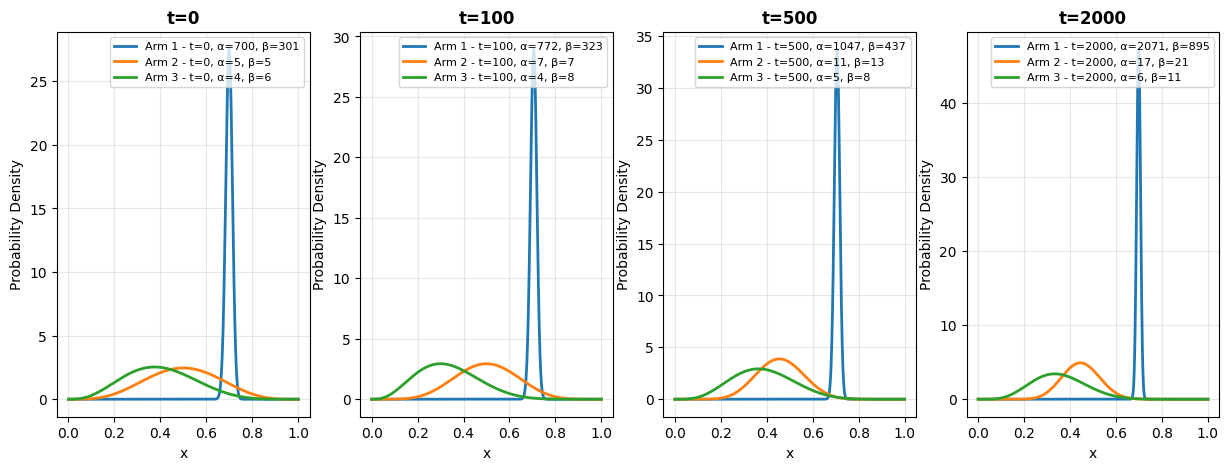

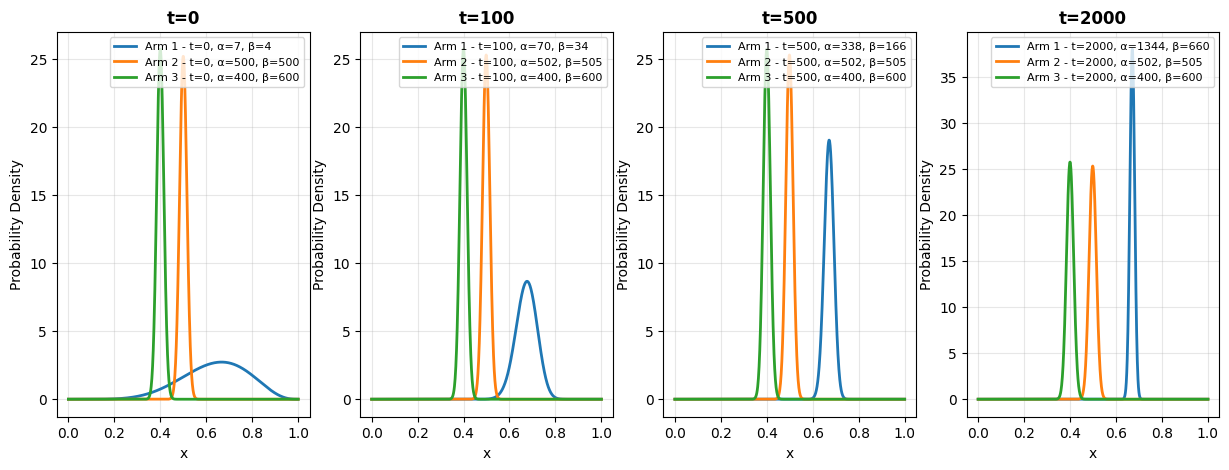

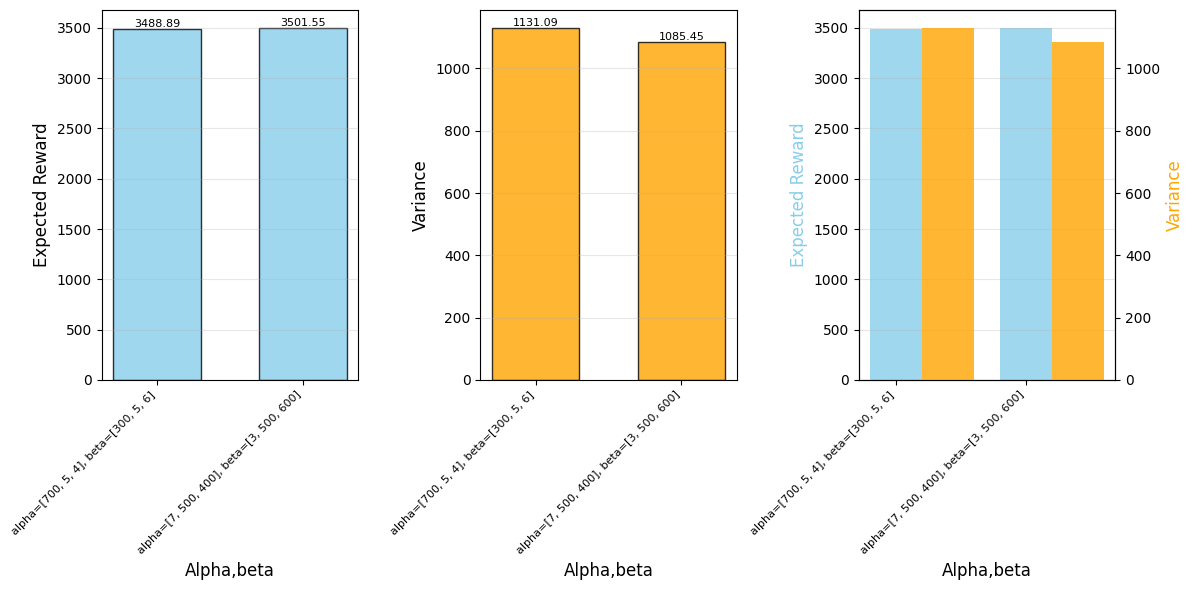

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'ts': [
        ([700, 5, 4], [300, 5,6]),  # 先验1
        ([7, 500, 400], [3, 500, 600])  # 先验2
    ]
}
results_rewards = {
    'ts': []
}
results_variances = {
    'ts': []
}

# 运行实验
for value in experiments['ts']:
    trial_rewards_list = []  # 用于记录每次实验的奖励
    cumulative_rewards = 0
    
    for trial_idx in range(num_trials):
        bandit = ThompsonSampling(alpha=value[0], beta=value[1])

        trial_rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)
            cumulative_rewards += reward

            # 每增加1000步绘制一次当前所有臂的Beta分布
            if trial_idx == num_trials - 1 and t in [0, 100, 500, 2000]:
                # 创建一个全局的图形（在循环外）
                if trial_idx == num_trials - 1 and t == 0:
                    # 计算出子图的数量，这里我们以2000步为间隔，最多绘制5个子图
                    num_subplots = 4  # 这里可以根据需要调整
                    fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))  # 每行放置多个子图

                x = np.linspace(0, 1, 1000)

                # 假设 t 取值为 0, 100, 500, 2000
                t_values = [0, 100, 500, 2000]

                # 映射 t 到对应的索引
                t_to_index = {0: 0, 100: 1, 500: 2, 2000: 3}

                # 绘制所有臂的Beta分布，每个时刻使用不同的颜色或线型
                for i, (alpha_param, beta_param) in enumerate(zip(bandit.alpha, bandit.beta)):
                    pdf = beta.pdf(x, alpha_param, beta_param)
                    axs_index = t_to_index[t]
                    axs[axs_index].plot(x, pdf, label=f"Arm {i+1} - t={t}, α={alpha_param}, β={beta_param}", 
                            linestyle='-' if (t in [0, 100, 500, 2000]) else '--', linewidth=2)

                # 设置标题、标签等
                axs[axs_index].set_title(f"t={t}", fontsize=12, weight='bold')
                axs[axs_index].set_xlabel('x', fontsize=10)
                axs[axs_index].set_ylabel('Probability Density', fontsize=10)
                axs[axs_index].grid(True, alpha=0.3)
                axs[axs_index].legend(loc='upper right', fontsize=8)

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ts'].append(mean_reward)
    results_variances['ts'].append(variance_reward)

# 打印结果
for idx, value in enumerate(experiments['ts']):
    print(f"alpha = {value[0]} beta = {value[1]} reward: {results_rewards['ts'][idx]:.2f} variances: {results_variances['ts'][idx]:.2f}")

# 绘制期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 绘制 TS 算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()


We find that when we know the correct a priori more, we are more likely to make the correct choice.

##### What if there's something wrong with our prior information

(7) [($\alpha_1$ = 300, $\beta_1$ = 700), ($\alpha_2$ = 5, $\beta_2$ = 5), ($\alpha_3$ = 6, $\beta_3$ = 4)]

(8) [($\alpha_1$ = 3, $\beta_1$ = 7), ($\alpha_2$ = 500, $\beta_2$ = 500), ($\alpha_3$ = 600, $\beta_3$ = 300)]

alpha = [300, 5, 6] beta = [700, 5, 4] reward: 2478.95 variances: 1211.30
alpha = [3, 500, 700] beta = [7, 500, 300] reward: 3320.32 variances: 10497.88


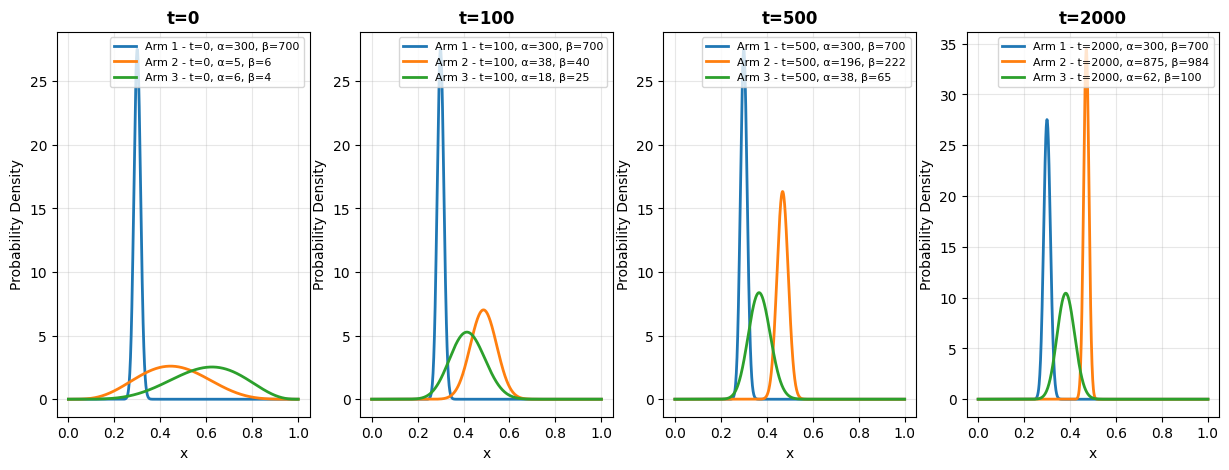

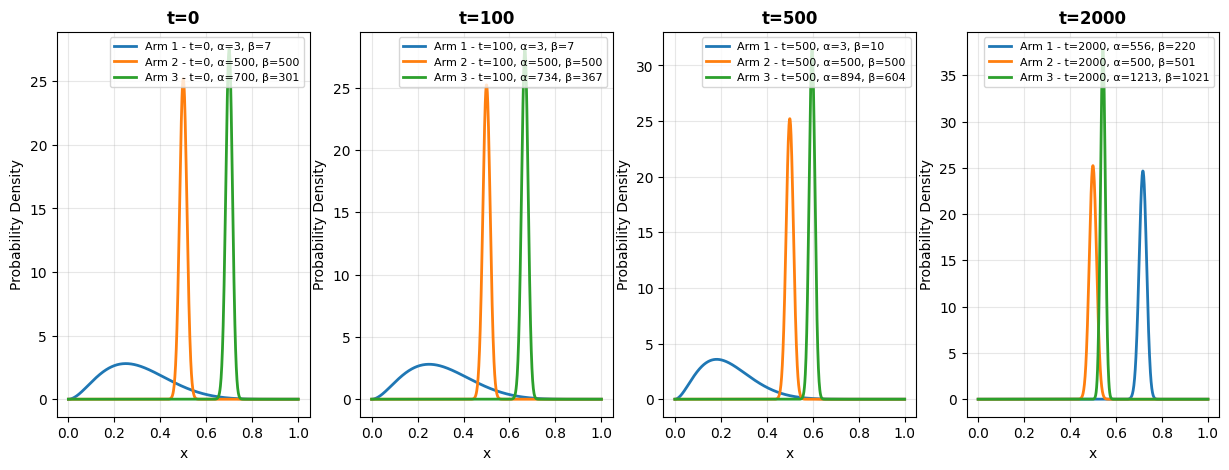

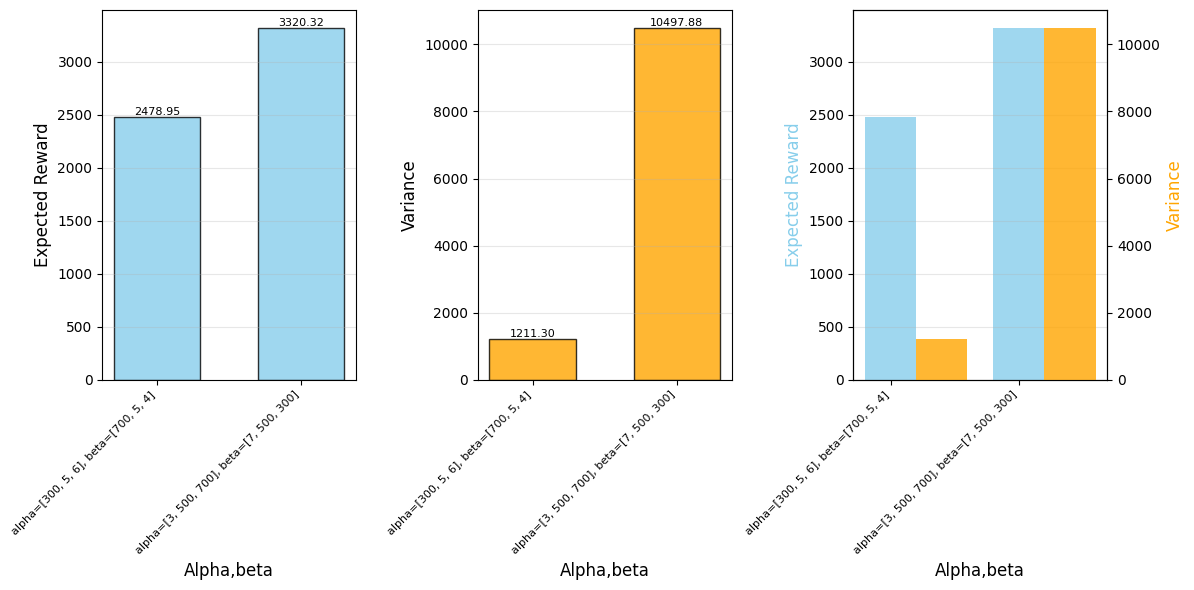

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'ts': [
        ([300, 5, 6], [700, 5,4]),  # 先验1
        ([3, 500, 700], [7, 500, 300])  # 先验2
    ]
}
results_rewards = {
    'ts': []
}
results_variances = {
    'ts': []
}

# 运行实验
for value in experiments['ts']:
    trial_rewards_list = []  # 用于记录每次实验的奖励
    cumulative_rewards = 0
    
    for trial_idx in range(num_trials):
        bandit = ThompsonSampling(alpha=value[0], beta=value[1])

        trial_rewards = []
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            trial_rewards.append(reward)
            cumulative_rewards += reward

            # 每增加1000步绘制一次当前所有臂的Beta分布
            if trial_idx == num_trials - 1 and t in [0, 100, 500, 2000]:
                # 创建一个全局的图形（在循环外）
                if trial_idx == num_trials - 1 and t == 0:
                    # 计算出子图的数量，这里我们以2000步为间隔，最多绘制5个子图
                    num_subplots = 4  # 这里可以根据需要调整
                    fig, axs = plt.subplots(1, num_subplots, figsize=(15, 5))  # 每行放置多个子图

                x = np.linspace(0, 1, 1000)

                # 假设 t 取值为 0, 100, 500, 2000
                t_values = [0, 100, 500, 2000]

                # 映射 t 到对应的索引
                t_to_index = {0: 0, 100: 1, 500: 2, 2000: 3}

                # 绘制所有臂的Beta分布，每个时刻使用不同的颜色或线型
                for i, (alpha_param, beta_param) in enumerate(zip(bandit.alpha, bandit.beta)):
                    pdf = beta.pdf(x, alpha_param, beta_param)
                    axs_index = t_to_index[t]
                    axs[axs_index].plot(x, pdf, label=f"Arm {i+1} - t={t}, α={alpha_param}, β={beta_param}", 
                            linestyle='-' if (t in [0, 100, 500, 2000]) else '--', linewidth=2)

                # 设置标题、标签等
                axs[axs_index].set_title(f"t={t}", fontsize=12, weight='bold')
                axs[axs_index].set_xlabel('x', fontsize=10)
                axs[axs_index].set_ylabel('Probability Density', fontsize=10)
                axs[axs_index].grid(True, alpha=0.3)
                axs[axs_index].legend(loc='upper right', fontsize=8)

        trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

    # 计算期望奖励和方差
    mean_reward = cumulative_rewards / num_trials
    variance_reward = np.var(trial_rewards_list)

    results_rewards['ts'].append(mean_reward)
    results_variances['ts'].append(variance_reward)

# 打印结果
for idx, value in enumerate(experiments['ts']):
    print(f"alpha = {value[0]} beta = {value[1]} reward: {results_rewards['ts'][idx]:.2f} variances: {results_variances['ts'][idx]:.2f}")

# 绘制期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 绘制期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 1 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 绘制 TS 算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()


We found that when we know that the error information of the arm with the highest probability of winning is relatively large, it will cause us to misestimate its probability of winning, which will lead to a significant reduction in our final score, and this phenomenon is not accidental. However, when we know the wrong priori of other arms, the expectation change is relatively small. The reason is that we can recover the guess of the probability of the arm with the highest probability of winning the prize through several experiments, and then pull it more times in the development and utilization stage, and the expected score is larger.

In general, we find that when applying the TS algorithm, we should make as good a guess as possible, otherwise it will reduce our score expectations. In addition, if we can make a guess about the relative size of the arm with a high probability of winning, we will have a higher score.

## Problem 5



The exploration-exploitation trade-off is a central concept in multi-armed bandit (MAB) algorithms, and it arises from the need to balance two competing objectives:

1. **Exploration**: Trying out different options (or "arms") to gather more information about their potential. The goal of exploration is to learn more about which arms provide the highest rewards, even if it means taking actions that may not yield the best reward in the short term.

2. **Exploitation**: Leveraging the current knowledge to maximize the reward based on past experiences. In exploitation, the algorithm favors the arm with the highest observed reward so far, assuming that this arm will continue to perform well.

The trade-off occurs because both exploration and exploitation are necessary but contradictory:

- **Exploration** can lead to suboptimal immediate rewards because you're trying arms that may not perform well, but it helps in gathering data that can guide better decisions in the long run.
- **Exploitation** maximizes immediate rewards by sticking with the arm that seems to be the best based on current knowledge, but it can miss out on potentially better options in the future by not exploring less frequently tried arms.

### In the context of bandit algorithms:

- **Epsilon-Greedy**: This algorithm controls exploration and exploitation using a parameter \( \epsilon \). With probability \( \epsilon \), the algorithm explores by choosing a random arm (exploration), and with probability \( 1 - \epsilon \), it exploits by selecting the arm with the highest estimated reward (exploitation). As \( \epsilon \) decreases over time, the algorithm shifts towards more exploitation, relying on the accumulated knowledge.
  
- **Upper Confidence Bound (UCB)**: UCB dynamically adjusts the exploration-exploitation balance by selecting arms based on both the estimated reward and the uncertainty (or variance) associated with each arm. Arms with high uncertainty are explored more frequently, while arms with high expected rewards (and low uncertainty) are exploited more. The exploration is explicitly controlled by the confidence bound term, which depends on the number of times an arm has been pulled.
  
- **Thompson Sampling**: This algorithm uses a probabilistic model to balance exploration and exploitation. It samples from the posterior distribution of each arm's expected reward and selects the arm with the highest sampled value. The exploration comes from the inherent randomness in the posterior distributions, which encourages trying arms that are less certain about their expected reward, while exploitation naturally happens when one arm consistently has a high sampled reward.

Each algorithm addresses the exploration-exploitation dilemma differently, but they all strive to find the optimal balance to maximize cumulative rewards over time. The key challenge is to explore enough to uncover the best options, but also to exploit them sufficiently to capitalize on the knowledge gathered.

In addition, we found that we should make a concrete analysis based on specific situations. Although some algorithms (which can change the variance and expected score by adjusting parameters) are not stable enough, they are likely to make us obtain the greatest benefits, that is, after selecting the arm with the highest probability of winning the prize, pull it all the time, which is suitable for situations with very little cost. If the cost is more, we should pursue the maximum profit and higher stability, at this time we should maintain the spirit of exploration, get enough information, in the development and utilization.

In [57]:
cumulative_rewards = 0
cumulative_regrets = 0

for _ in range(num_trials):
    bandit = EpsilonGreedy(epsilon=1)
        
    trial_rewards = []
    for t in range(N):
        bandit.modify_parameter(epsilon= 0.98**t)
        arm = bandit.select_arm()
        reward = bandit.pull(arm)
        bandit.update(arm, reward)
        cumulative_rewards += reward
        regret = max(bandit.theta) - bandit.theta[arm] 
        cumulative_regrets += regret
results_rewards['epsilon_greedy'].append(cumulative_rewards / num_trials)
results_regrets['epsilon_greedy'].append(cumulative_regrets / num_trials)

print("epsilon = 0.98^t   reward: ", results_rewards['epsilon_greedy'][3], " regret: ", results_regrets['epsilon_greedy'][3])


KeyError: 'epsilon_greedy'